# Imports

In [1]:
#%pip install pandas numpy seaborn matplotlib imbalanced-learn scikit-learn lightgbm xgboost

In [ ]:
# Math
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sampling
from imblearn.over_sampling import SMOTE, SMOTENC

# Feature Selection
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

# Training and Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# ROC_AUC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Models used
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Mute warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset into a dataframe
df = pd.read_csv('../datasets/diabetes_012_health_indicators_BRFSS2015.csv')

# Overview of The Dataset

**About Dataset:**
The Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC. Each year, the survey collects responses from over 400,000 Americans on health-related risk behaviors, chronic health conditions, and the use of preventative services. It has been conducted every year since 1984. For this project, a csv of the dataset available on Kaggle for the year 2015 was used. This dataset contains 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_012 has 3 classes. 0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes. There is class imbalance in this dataset. This dataset has 21 feature variables. The motivation behind this dataset is that early diagnosis by public health officials through predictive and classification models for diabetes can lead to lifestyle changes and more effective treatment.

---
**Source:** https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data


Dataset Attributes:
1. **Diabetes_012**: 0 = no diabetes, 1 = prediabetes, 2 = diabetes. ( Target Class)
2. **HighBP**: 0 = no high blood pressure, 1 = high blood pressure.
3. **HighChol**: 0 = no high cholesterol, 1 = high cholesterol.
4. **CholCheck**: 0 = no cholesterol check in past 5 years, 1 = checked.
5. **BMI**: Body Mass Index (numeric value).
6. **Smoker**: 0 = never smoked, 1 = smoked at least 100 cigarettes.
7. **Stroke**: 0 = no history of stroke, 1 = history of stroke.
8. **HeartDiseaseorAttack**: 0 = no heart disease/attack, 1 = history of coronary heart disease or heart attack.
9. **PhysActivity**: 0 = no physical activity, 1 = active in past 30 days (excluding job).
10. **Fruits**: 0 = does not consume fruit daily, 1 = consumes fruit daily.
11. **Veggies**: 0 = does not consume vegetables daily, 1 = consumes vegetables daily.
12. **HvyAlcoholConsump**: 0 = not a heavy drinker, 1 = heavy drinker (men >14, women >7 drinks/week).
13. **AnyHealthcare**: 0 = no healthcare coverage, 1 = has healthcare coverage.
14. **NoDocbcCost**: 0 = no cost barriers to doctor, 1 = avoided doctor due to cost.
15. **GenHlth**: General health rating, 1 (excellent) to 5 (poor).
16. **MentHlth**: Days of poor mental health in past 30 days (1-30).
17. **PhysHlth**: Days of poor physical health in past 30 days (1-30).
18. **DiffWalk**: 0 = no difficulty walking, 1 = serious difficulty.
19. **Sex**: 0 = female, 1 = male.
20. **Age**: Age category, 1 (18-24) to 13 (80+).
21. **Education**: Education level, 1 (no school) to 6 (college graduate).
22. **Income**: Income level, 1 (<$10,000) to 8 ($75,000+).


# Exploration of The Dataset

In [4]:
pd.set_option('display.max_row', 25)
pd.set_option('display.max_column', 25)

In [5]:
print("Seeing the first 10 rows of the data:")
df.head(10)

Seeing the first 10 rows of the data:


Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        NaN  24.0     0.0     0.0   
5           0.0     1.0       1.0        1.0  25.0     1.0     NaN   
6           0.0     1.0       0.0        1.0  30.0     1.0     0.0   
7           0.0     1.0       1.0        1.0  25.0     1.0     0.0   
8           2.0     1.0       1.0        1.0  30.0     1.0     0.0   
9           0.0     0.0       0.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
0                   0.0           0.0     0.0      1.0                NaN   
1                   0.0           1.0     0.0      0.0                0.0   
2                   0.0           0.0     1.0      NaN                0.0   
3                   0.0           1.0     1.0      1.0                0.0   
4                   0.0           1.0     1.0      1.0                0.0   
5                   0.0           1.0     1.0      1.0                0.0   
6                   0.0           0.0     0.0      NaN                0.0   
7                   0.0           1.0     0.0      1.0                0.0   
8                   1.0           0.0     1.0      1.0                0.0   
9                   0.0           0.0     0.0      1.0                0.0   

   AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  \
0            1.0          0.0      5.0      18.0      15.0       1.0  0.0   
1            NaN          1.0      3.0       0.0       0.0       0.0  0.0   
2            1.0          1.0      5.0      30.0      30.0       1.0  0.0   
3            1.0          0.0      2.0       0.0       0.0       0.0  0.0   
4            1.0          0.0      2.0       3.0       0.0       0.0  0.0   
5            1.0          0.0      2.0       0.0       2.0       0.0  1.0   
6            1.0          0.0      3.0       0.0      14.0       0.0  0.0   
7            1.0          0.0      3.0       0.0       NaN       1.0  0.0   
8            1.0          0.0      5.0      30.0      30.0       1.0  0.0   
9            NaN          0.0      2.0       0.0       0.0       0.0  1.0   

    Age  Education  Income  
0   9.0        4.0     3.0  
1   7.0        6.0     1.0  
2   9.0        4.0     8.0  
3  11.0        3.0     6.0  
4  11.0        5.0     4.0  
5  10.0        6.0     8.0  
6   9.0        6.0     7.0  
7  11.0        4.0     4.0  
8   9.0        5.0     1.0  
9   8.0        4.0     3.0

In [6]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of features (columns): {df.shape[1]}")

Number of rows: 253680
Number of features (columns): 22


In [7]:
print("Checking the data types of each feature:")
df.dtypes

Checking the data types of each feature:


Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [8]:
df.nunique()

Diabetes_012             3
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     83
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [9]:
print("Showing statistical analysis of each feature:")
df.describe()

Showing statistical analysis of each feature:


Diabetes_012         HighBP       HighChol      CholCheck  \
count  253680.000000  245907.000000  245761.000000  245714.000000   
mean        0.296921       0.429130       0.424180       0.962668   
std         0.698160       0.494953       0.494219       0.189574   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         2.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  245886.000000  245744.000000  245945.000000         245889.000000   
mean       28.381075       0.443470       0.040566              0.094160   
std         6.601131       0.496795       0.197283              0.292052   
min        12.000000       0.000000       0.000000              0.000000   
25%        24.000000       0.000000       0.000000              0.000000   
50%        27.000000       0.000000       0.000000              0.000000   
75%        31.000000       1.000000       0.000000              0.000000   
max        98.000000       1.000000       1.000000              1.000000   

        PhysActivity         Fruits        Veggies  HvyAlcoholConsump  \
count  245789.000000  245853.000000  245833.000000      245699.000000   
mean        0.756258       0.634338       0.811339           0.056235   
std         0.429339       0.481616       0.391240           0.230376   
min         0.000000       0.000000       0.000000           0.000000   
25%         1.000000       0.000000       1.000000           0.000000   
50%         1.000000       1.000000       1.000000           0.000000   
75%         1.000000       1.000000       1.000000           0.000000   
max         1.000000       1.000000       1.000000           1.000000   

       AnyHealthcare    NoDocbcCost        GenHlth       MentHlth  \
count  245798.000000  245802.000000  245904.000000  245934.000000   
mean        0.951135       0.084060       2.510984       3.185965   
std         0.215587       0.277478       1.068300       7.414059   
min         0.000000       0.000000       1.000000       0.000000   
25%         1.000000       0.000000       2.000000       0.000000   
50%         1.000000       0.000000       2.000000       0.000000   
75%         1.000000       0.000000       3.000000       2.000000   
max         1.000000       1.000000       5.000000      30.000000   

            PhysHlth       DiffWalk            Sex            Age  \
count  245861.000000  245814.000000  245989.000000  245729.000000   
mean        4.240530       0.167981       0.440483       8.033130   
std         8.716585       0.373850       0.496446       3.054597   
min         0.000000       0.000000       0.000000       1.000000   
25%         0.000000       0.000000       0.000000       6.000000   
50%         0.000000       0.000000       0.000000       8.000000   
75%         3.000000       0.000000       1.000000      10.000000   
max        30.000000       1.000000       1.000000      13.000000   

           Education         Income  
count  245716.000000  245825.000000  
mean        5.050709       6.055182  
std         0.985887       2.070524  
min         1.000000       1.000000  
25%         4.000000       5.000000  
50%         5.000000       7.000000  
75%         6.000000       8.000000  
max         6.000000       8.000000

In [10]:
print("Total number of cells (Rows x Columns):")
df.size

Total number of cells (Rows x Columns):


5580960

In [11]:
print("Checking the total missing values")
df.isnull().sum()

Checking the total missing values


Diabetes_012               0
HighBP                  7773
HighChol                7919
CholCheck               7966
BMI                     7794
Smoker                  7936
Stroke                  7735
HeartDiseaseorAttack    7791
PhysActivity            7891
Fruits                  7827
Veggies                 7847
HvyAlcoholConsump       7981
AnyHealthcare           7882
NoDocbcCost             7878
GenHlth                 7776
MentHlth                7746
PhysHlth                7819
DiffWalk                7866
Sex                     7691
Age                     7951
Education               7964
Income                  7855
dtype: int64

In [12]:
print("Checking for duplicates")
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")

Checking for duplicates

Number of duplicate rows: 9852


In [13]:
print("Target class distribution:")
df['Diabetes_012'].value_counts()

Target class distribution:


Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

# General Visualization of The Dataset

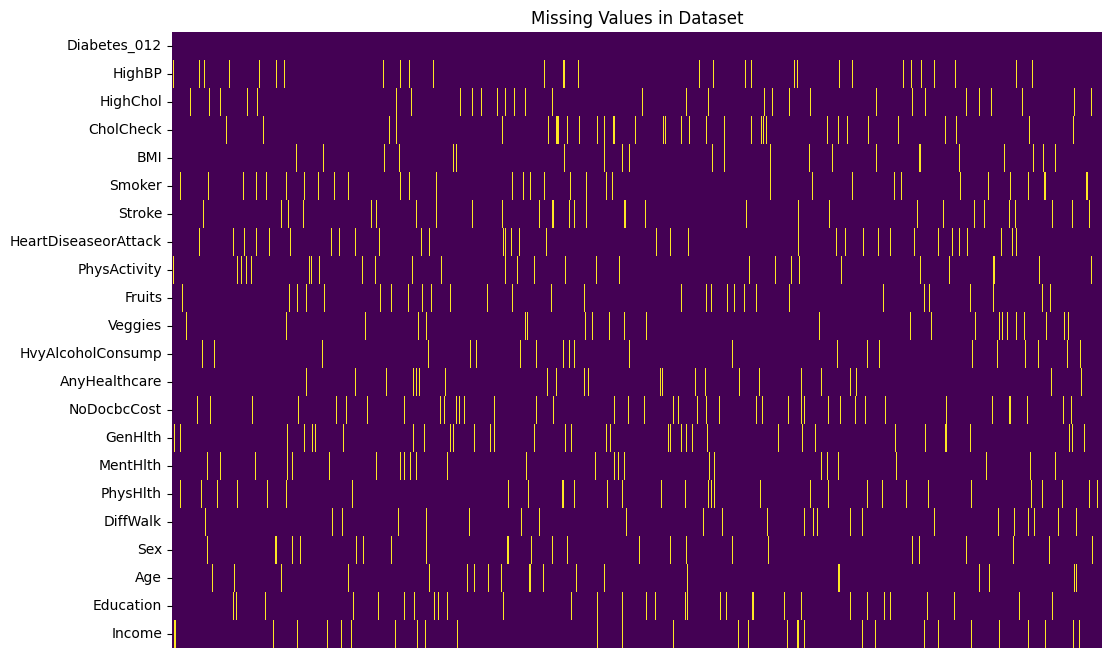

In [14]:
# Visualize missing values as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull().T, cbar=False, cmap='viridis', xticklabels=False, yticklabels=True)
plt.title('Missing Values in Dataset')
plt.show()

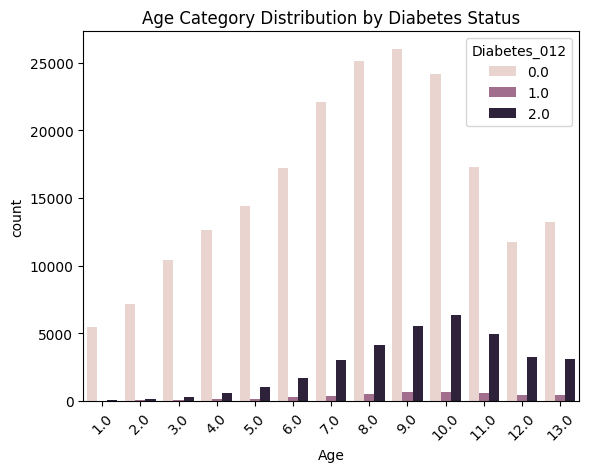

In [15]:
# Plot distribution of diabetes by age category to find correlation between the two
sns.countplot(x='Age', hue='Diabetes_012', data=df)
plt.title('Age Category Distribution by Diabetes Status')
plt.xticks(rotation=45)
plt.show()


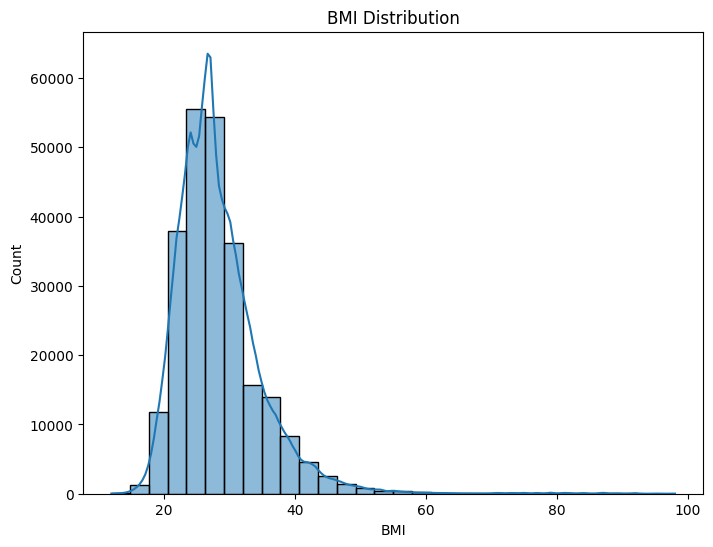

In [16]:
# Plot the distribution of BMI to see where the majority end up at
plt.figure(figsize=(8,6))
sns.histplot(df['BMI'], kde=True, bins=30)
plt.title('BMI Distribution')
plt.show()


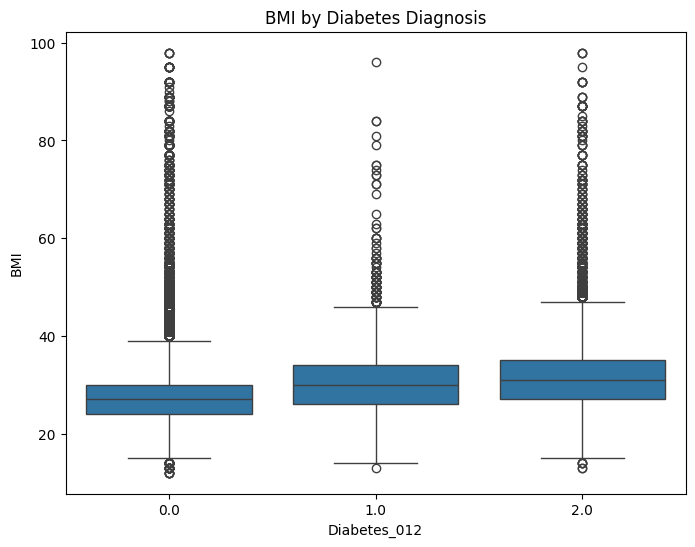

In [17]:
# Detect outliers in BMI by each diabetes target (0 = no diabates, 1 = prediabetes, 2 = diabetes)
plt.figure(figsize=(8,6))
sns.boxplot(x='Diabetes_012', y='BMI', data=df)
plt.title('BMI by Diabetes Diagnosis')
plt.show()


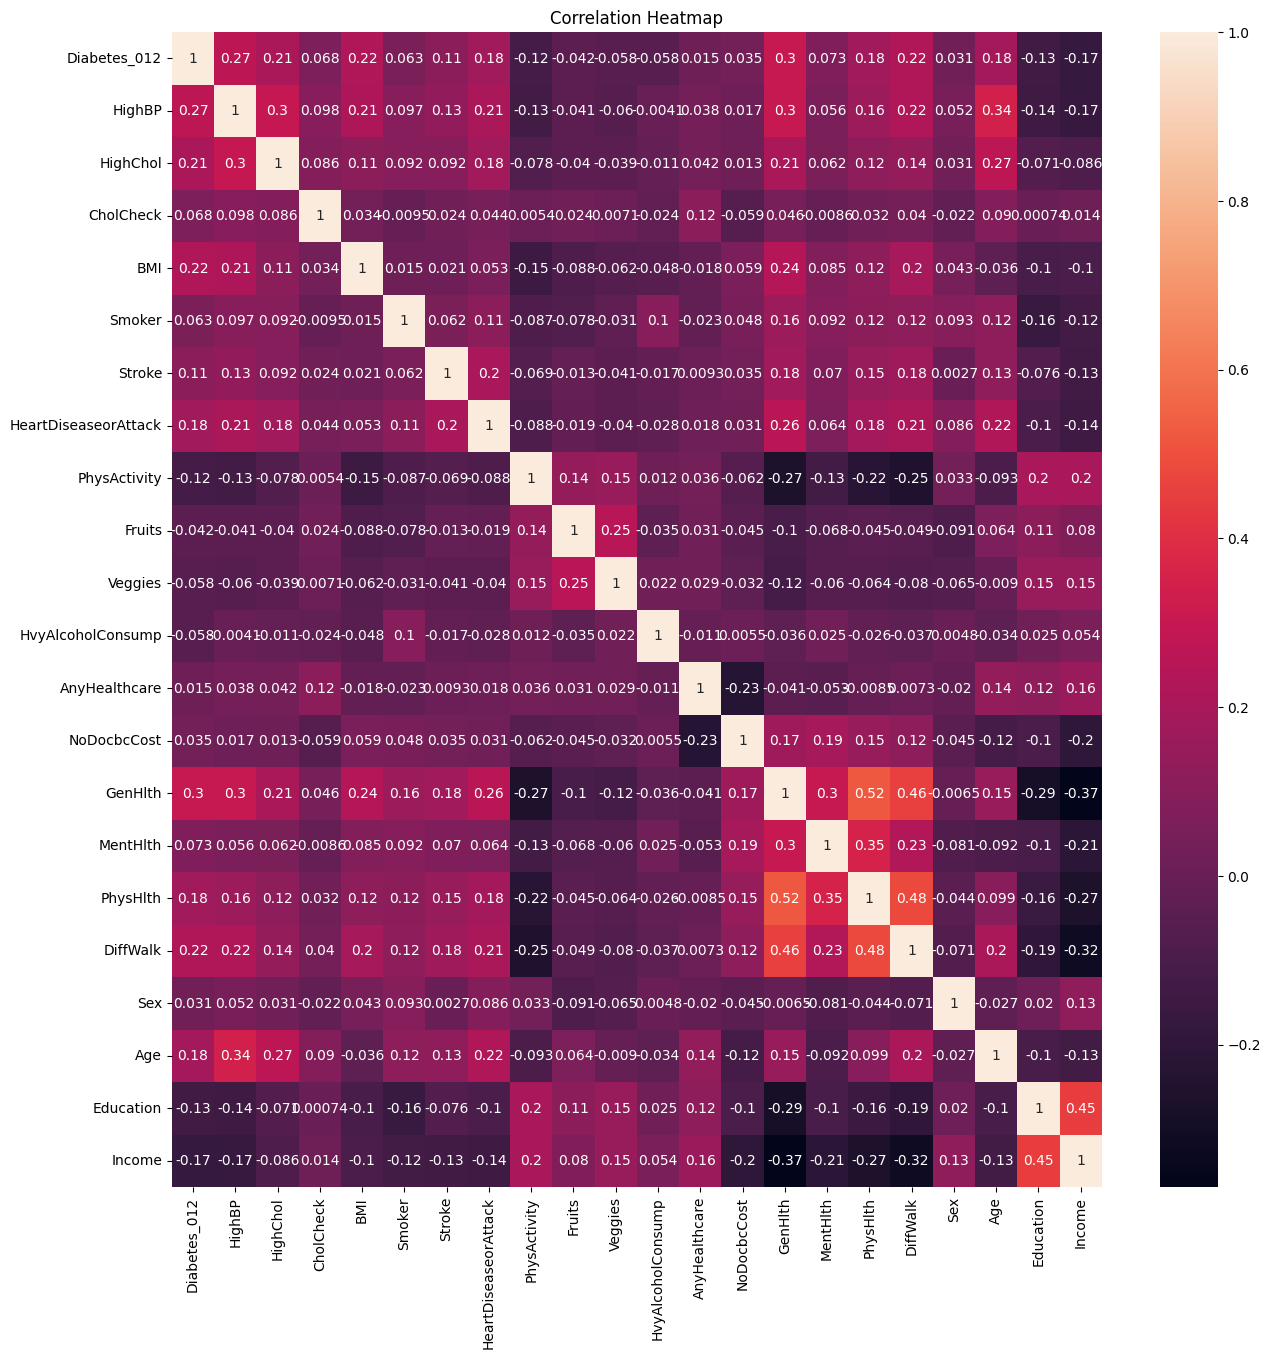

In [18]:
# Plot to see if certain features tend to correlate with one another
plt.figure(figsize=(15,15))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()


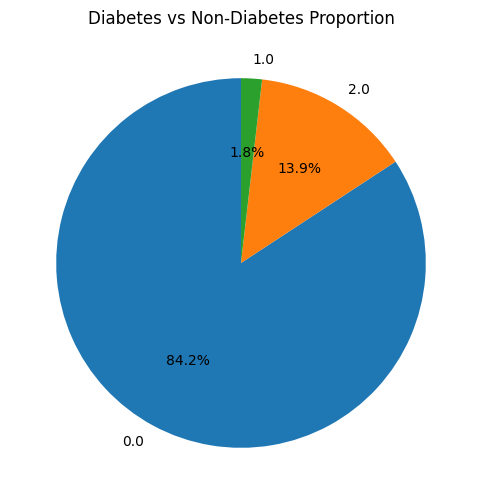

In [19]:
# Plot class distribution for diabetes diagnosis (0 = no diabates, 1 = prediabetes, 2 = diabetes)
diabetes_counts = df['Diabetes_012'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Diabetes vs Non-Diabetes Proportion')
plt.show()


# Dataset Preprocessing

Methodology:
- Convert Datatypes (float64 -> categorical)
- Null Handling (Mean, Median, Mode, KNN Imputation)
- Duplicate Handling
- Discretization and standarizing features
- Resampling (Majority undersampling, minority oversamplimg)
- Outlier Handling ( drop or normalize )
- Feature selection ( filter and embedded methods )

## Data Cleaning

### Convert Datatypes

Before we get starting, we first need to to convert each feature to its appropriate datatype because it will later affect data imputation and resampling

In [20]:
for column in df.columns:
    if column != 'BMI':
        df[column] = df[column].astype('category')
    
    unique_values = df[column].dropna().unique()
    print(f"Unique values for {column}: {unique_values}")


Unique values for Diabetes_012: [0.0, 2.0, 1.0]
Categories (3, float64): [0.0, 1.0, 2.0]
Unique values for HighBP: [1.0, 0.0]
Categories (2, float64): [0.0, 1.0]
Unique values for HighChol: [1.0, 0.0]
Categories (2, float64): [0.0, 1.0]
Unique values for CholCheck: [1.0, 0.0]
Categories (2, float64): [0.0, 1.0]
Unique values for BMI: [40. 25. 28. 27. 24. 30. 34. 26. 33. 21. 23. 22. 38. 32. 37. 31. 29. 20.
 35. 45. 39. 19. 47. 18. 36. 43. 55. 49. 42. 17. 16. 41. 44. 50. 59. 48.
 52. 46. 54. 57. 53. 14. 15. 51. 58. 63. 61. 56. 74. 62. 64. 66. 73. 85.
 60. 67. 65. 70. 82. 79. 92. 68. 72. 88. 96. 13. 81. 71. 75. 12. 77. 69.
 76. 87. 89. 84. 95. 98. 91. 86. 83. 80. 90.]
Unique values for Smoker: [1.0, 0.0]
Categories (2, float64): [0.0, 1.0]
Unique values for Stroke: [0.0, 1.0]
Categories (2, float64): [0.0, 1.0]
Unique values for HeartDiseaseorAttack: [0.0, 1.0]
Categories (2, float64): [0.0, 1.0]
Unique values for PhysActivity: [0.0, 1.0]
Categories (2, float64): [0.0, 1.0]
Unique values 

### Null Handling

As previously seen by the data exploration, there is a class inbalance, and as such, how we are going to deal with the nulls for each class will differ.

Starting with non-majority classes, we need to deal with the nulls in a more sophisticated manner using KNN imputation.

In [21]:
"""# =========== KNN Imputation  =========== 

df_class_1_2 = df[(df['Diabetes_012'].isin([1, 2]))]
df_class_0 = df[df['Diabetes_012'] == 0]

imputer = KNNImputer(n_neighbors=5)
df_cleaned_class_1_2 = pd.DataFrame(imputer.fit_transform(df_class_1_2), columns=df.columns)

# Final cleaned df (Class 1, 2)
df_cleaned_1_2 = pd.concat([df_cleaned_class_1_2, df_class_0])"""

"# =========== KNN Imputation  =========== \n\ndf_class_1_2 = df[(df['Diabetes_012'].isin([1, 2]))]\ndf_class_0 = df[df['Diabetes_012'] == 0]\n\nimputer = KNNImputer(n_neighbors=5)\ndf_cleaned_class_1_2 = pd.DataFrame(imputer.fit_transform(df_class_1_2), columns=df.columns)\n\n# Final cleaned df (Class 1, 2)\ndf_cleaned_1_2 = pd.concat([df_cleaned_class_1_2, df_class_0])"

Future results and testing showed that, although KNN imputation seems like the best option given the data at hand, simple mean imputation yielded better results long term

In [22]:
# =========== Mean, Mode Imputation  ===========

df_class_1_2 = df[(df['Diabetes_012'].isin([1, 2]))]
df_class_0 = df[df['Diabetes_012'] == 0]

# Fill with mean if numerical columns and mode if categorical columns
for column in df_class_1_2.columns:
    if df_class_1_2[column].dtype == 'float64':
        df_class_1_2.loc[:, column] = df_class_1_2[column].fillna(df_class_1_2[column].mean())
    else:
        df_class_1_2.loc[:, column] = df_class_1_2[column].fillna(df_class_1_2[column].mode()[0])

df_cleaned_1_2 = pd.concat([df_class_1_2, df_class_0])


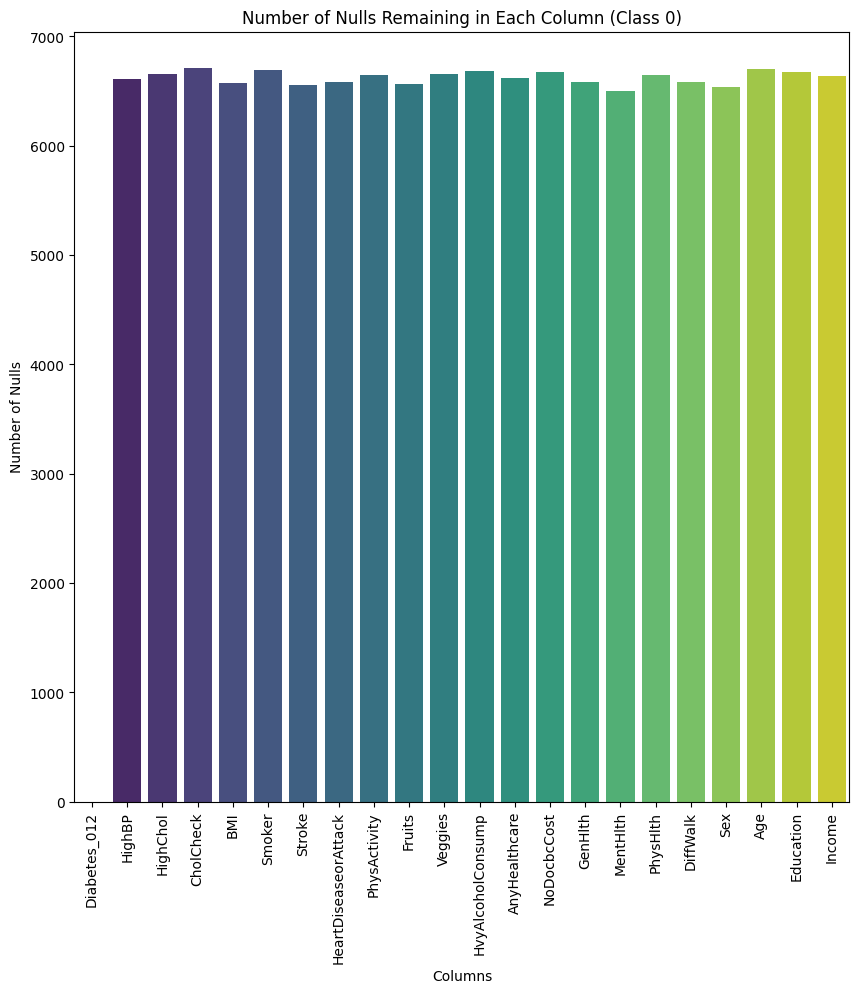

In [23]:
# =========== Visualize Nulls Remanining (Class 0) =========== 
null_counts = df_cleaned_1_2.isnull().sum()

plt.figure(figsize=(10, 10))
sns.barplot(x=null_counts.index, y=null_counts.values, palette='viridis')
plt.title("Number of Nulls Remaining in Each Column (Class 0)")
plt.xlabel("Columns")
plt.ylabel("Number of Nulls")
plt.xticks(rotation=90)
plt.show()

As for the majority class, we can take two different approaches when dealing with its nulls:
1. Mean, Median or Mode Imputation
2. Or since we are going to undersample the majority class anyways, null-infested records are not critical and thus could easily be dropped.

In [24]:
# =========== Mean, Median, Mode Imputation  =========== 

"""
Originally, I made three different copies for each type of imputation to be later tested for its accuracy. However, as I came to learn later, one can't 
use median or mean imputation on categorical features. Since almost of the features of ths dataset are categorical, it seems only natural to use mode for all
catgorical features while using median for the numerical columns much like was done abovewithclasses 1 and 2
"""
# Making copies to test accuracy for each method later
df_majority_mode = df_cleaned_1_2.copy()

# If dtype is float, then fill median, If categorical then fill mode
for column in df_majority_mode.columns:
    if df_majority_mode[column].dtype in ['float64']:
        df_majority_mode[column] = df_majority_mode[column].fillna(df_majority_mode[column].median())
    else:
        df_majority_mode[column] = df_majority_mode[column].fillna(df_majority_mode[column].mode()[0])



In [25]:
# =========== Dropping rows with nulls (Class 0) =========== 
df_majority_dropped = df_cleaned_1_2.copy()
df_majority_dropped = df_majority_dropped.dropna(axis=0)

In [26]:
print(f"Number of rows after dropping nulls: {df_majority_dropped.shape[0]}")

Number of rows after dropping nulls: 149969


Finally, we evaluate which method of handling nulls for the majority class yields the highest accuracy to proceed to the next step

In [ ]:
# =========== Evaluate Imputation Method =========== 

accuracy_cleaned=0
df_cleaned = []
method_cleaned = ''

def evaluate_imputation(df_imputed, method):
    global df_cleaned, accuracy_cleaned, method_cleaned
    
    x = df_imputed.drop(columns=['Diabetes_012'])
    y = df_imputed['Diabetes_012']
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    model =  RandomForestClassifier(n_jobs=-1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {method} imputation: {accuracy:.4f}")

    if(accuracy > accuracy_cleaned):
        df_cleaned = df_imputed
        accuracy_cleaned = accuracy
        method_cleaned = method


evaluate_imputation(df_majority_mode, "Mode")
evaluate_imputation(df_majority_dropped, "Dropped Nulls")

print(f"Best Accuracy: {accuracy_cleaned:.4f} for imputation: {method_cleaned}")


Accuracy for Mode imputation: 0.8322
Accuracy for Dropped Nulls imputation: 0.7414
Best Accuracy: 0.8322 for imputation: Mode


In [28]:
print("Checking the total number of missing values after null-handling: ")
df_cleaned.isnull().sum()

Checking the total number of missing values after null-handling: 


Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

### Duplicate Handling

Before proceeding to the next major step, we should drop duplicates asthey pose a risk of overfitting in our data.

In [29]:
df_cleaned = df_cleaned.drop_duplicates()

In [30]:
print(f"Number of rows after null and duplicate handling: {df_cleaned.shape[0]}")

Number of rows after null and duplicate handling: 227918


### Discretization

Before we proceed to the main step of resampling, we first need to bin continous features, which from previous visualizations appears to only be the BMI feature.

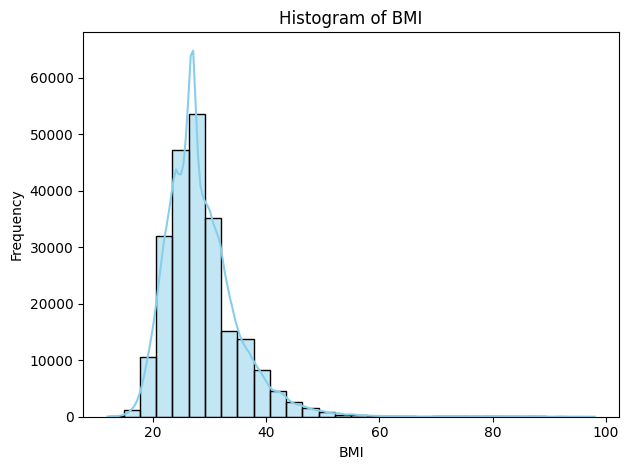

In [31]:
# First we plot the feature for better visualization
sns.histplot(df_cleaned['BMI'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

We can clearly see a case of positive skewness in the feature, as such we need to rid the data of its outliers.

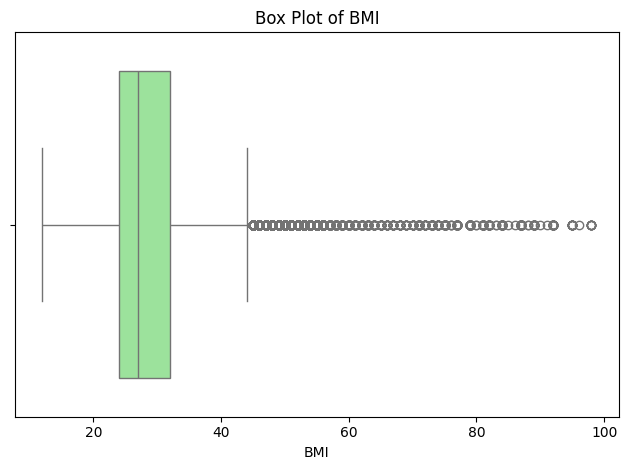

In [32]:
# Box plot to further visualize the outliers
sns.boxplot(x=df_cleaned['BMI'], color='lightgreen')
plt.title('Box Plot of BMI')
plt.xlabel('BMI')
plt.tight_layout()
plt.show()

We can then proceed to remove the outliers using IQR

In [33]:
# Using IQR to detect outliers and adjust them
Q1 = df_cleaned['BMI'].quantile(0.25)
Q3 = df_cleaned['BMI'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_cleaned.loc[:, 'BMI'] = np.where(df_cleaned['BMI'] < lower_bound, lower_bound, df_cleaned['BMI'])
df_cleaned.loc[:, 'BMI'] = np.where(df_cleaned['BMI'] > upper_bound, upper_bound, df_cleaned['BMI'])

Now we can visualize again to show the skewness has been fixed

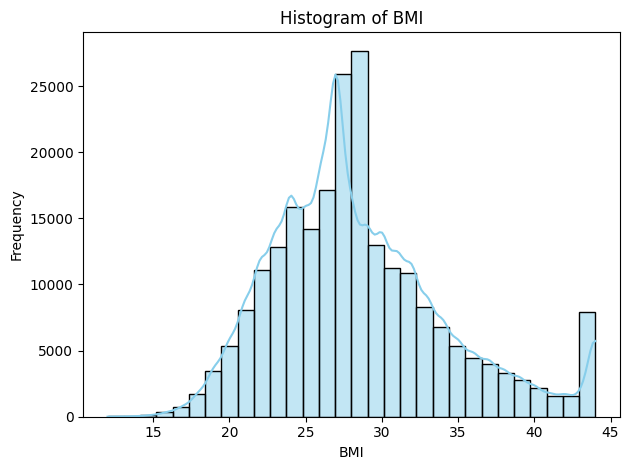

In [34]:
sns.histplot(df_cleaned['BMI'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

We can thus begin with the discretization process by relying on domain knowldge to accurately divide BMI into realistic subset that reflect reality.

**Source:** https://www.cdc.gov/bmi/adult-calculator/bmi-categories.html

In [35]:
# Divide into ranges based on domain knowledge

"""
Numeric labels and what they represent:
1: Underweight (BMI less than 18.5)
2: Healthy Weight (BMI from 18.5 to less than 25)
3: Overweight (BMI from 25 to less than 30)
4: Class 1 Obesity (BMI from 30 to less than 35)
5: Class 2 Obesity (BMI from 35 to less than 40)
6: Class 3 Obesity (Severe Obesity, BMI 40 or greater)
"""

bins = [-np.inf, 18.5, 25, 30, 35, 40, np.inf]
labels = [1, 2, 3, 4, 5, 6]
df_cleaned.loc[:, 'BMI'] = pd.cut(df_cleaned['BMI'], bins=bins, labels=labels, right=False)

Finally, we have successfully discretized the BMI feature

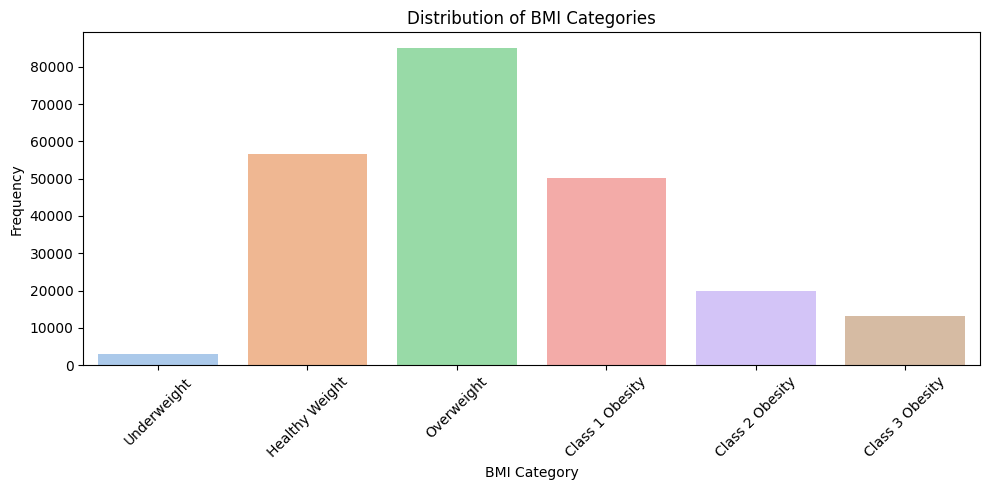

In [36]:
# Plot newly discretized BMI feature
plt.figure(figsize=(10, 5))
sns.countplot(data=df_cleaned, x='BMI', palette='pastel', legend=False)

plt.title('Distribution of BMI Categories')
plt.xlabel('BMI Category')
plt.ylabel('Frequency')
plt.xticks(ticks=range(6), labels=['Underweight', 'Healthy Weight', 'Overweight','Class 1 Obesity', 'Class 2 Obesity', 'Class 3 Obesity'], rotation=45)
plt.tight_layout() 
plt.show()

### Resampling

Now for the most crucial step for this dataset - resampling.
Since we have 3 classes, we'll undersample the majority class and oversample the minority  class to be close to total representation of the middle class.


In [37]:
# =========== Undersampling Majority Class  =========== 

abundant_class = df_cleaned[df_cleaned['Diabetes_012'] == 0]
minority_class_1 = df_cleaned[df_cleaned['Diabetes_012'] == 1]
minority_class_2 = df_cleaned[df_cleaned['Diabetes_012'] == 2]

undersample_size = 150000
undersampled_abundant_class = abundant_class.sample(n=undersample_size, random_state=42)

balanced_df = pd.concat([undersampled_abundant_class, minority_class_1, minority_class_2], ignore_index=True)


In [38]:
print(f"Undersampled number of rows: {balanced_df.shape[0]}")

Undersampled number of rows: 189712


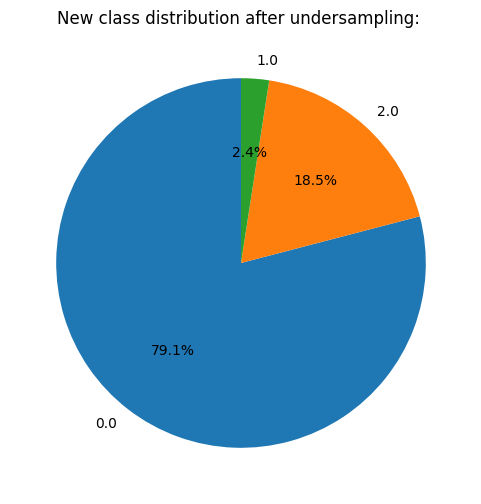

In [39]:
# Plot updated class distribution
class_distribution = balanced_df['Diabetes_012'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title("New class distribution after undersampling: ")
plt.show()


In [40]:
# =========== Oversampling Minority Classes  =========== 

"""
Originally, SMOTE was utilized for the oversampling process. However, two things became apparent:
    1. SMOTE works well with continous (numerical) classes only
    2. I forgot to check for the dtypes of my features, and might or might've not spent 2 days optimizing models on wrong synthetic data.

As a result, SMOTENC was used for its ability to deal with categorical features.
"""
x = balanced_df.drop(columns=['Diabetes_012'])
y = balanced_df['Diabetes_012']

# Apply SMOTE
indices = [i for i in range(1,len(x.columns))]
sampling_strategy = {0: 150000, 1: 150000, 2: 150000}

smote_nc = SMOTENC(categorical_features=indices, sampling_strategy=sampling_strategy, random_state=42)
x_resampled, y_resampled = smote_nc.fit_resample(x, y)

resampled_df = pd.DataFrame(x_resampled, columns=x.columns)
resampled_df['Diabetes_012'] = y_resampled

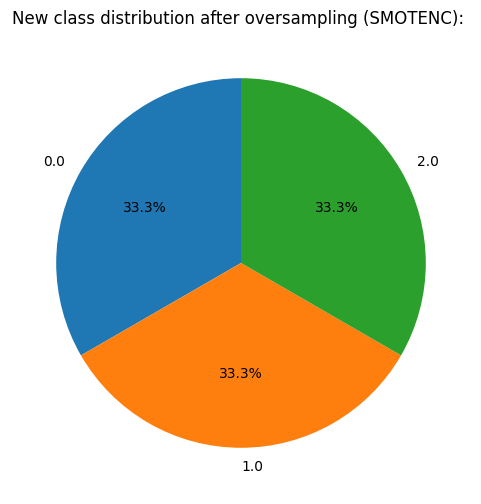

In [41]:
# Plot updated class distribution
class_distribution = resampled_df['Diabetes_012'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title("New class distribution after oversampling (SMOTENC): ")
plt.show()


In [42]:
resampled_df.isnull().sum()

HighBP                  5
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes_012            0
dtype: int64

Sometimes SMOTENC can yield nulls based on miscalculations, luckily it's such a small margin of error that it can be simply dropped

In [43]:
resampled_df = resampled_df.dropna()

### Outliers Handling

Now is the time to identify and deal with any outliers found across all features of the dataset.

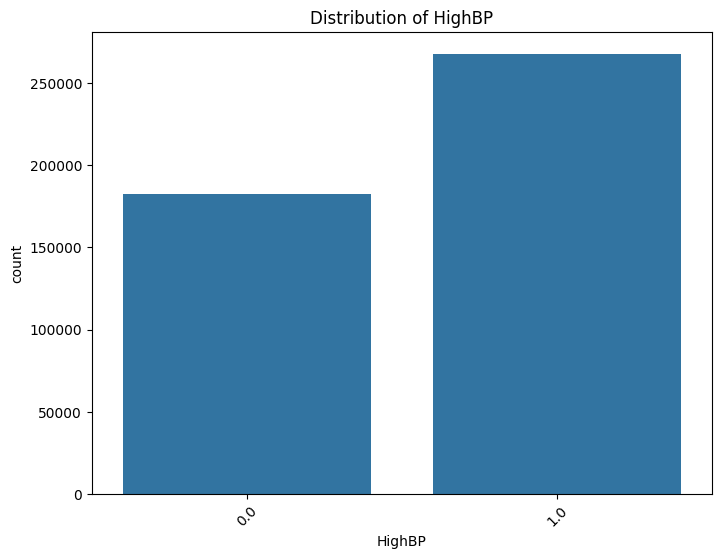

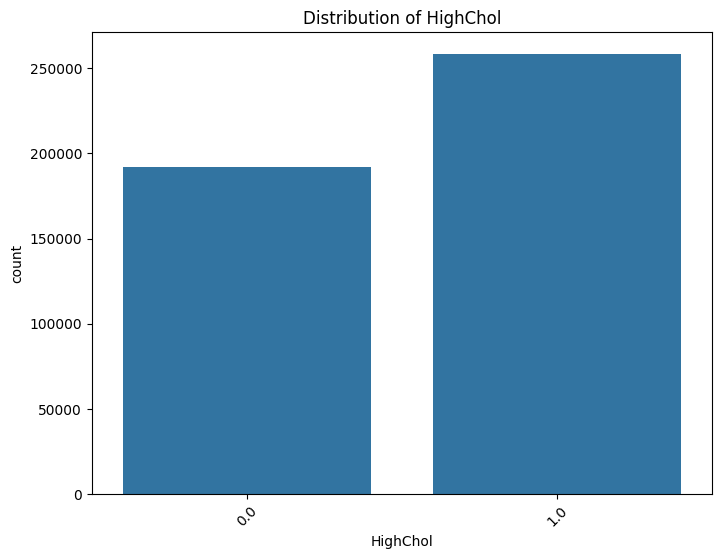

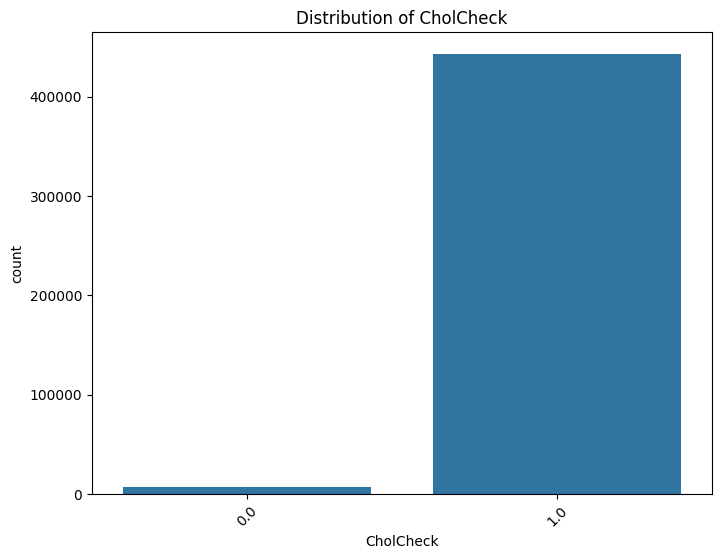

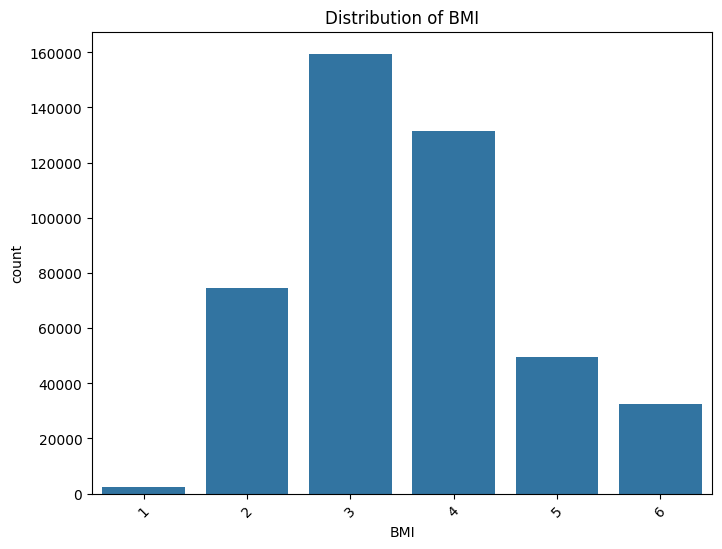

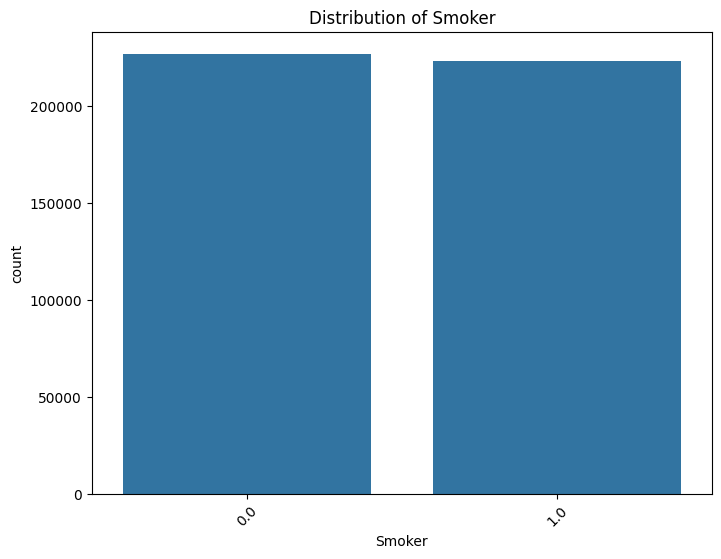

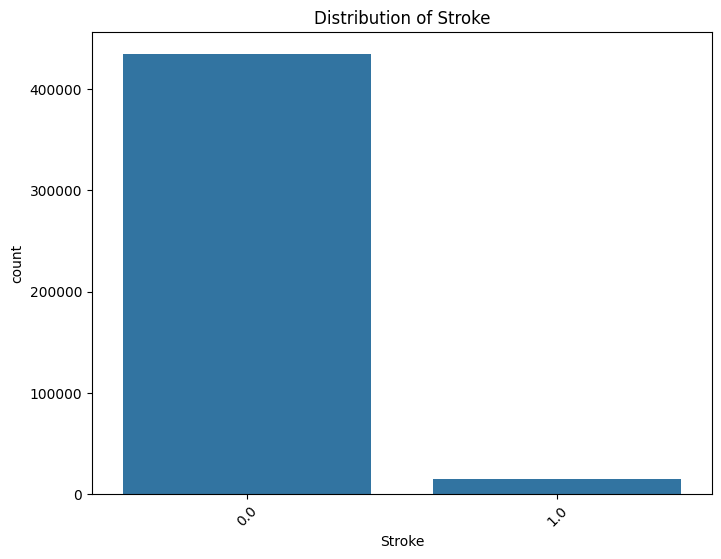

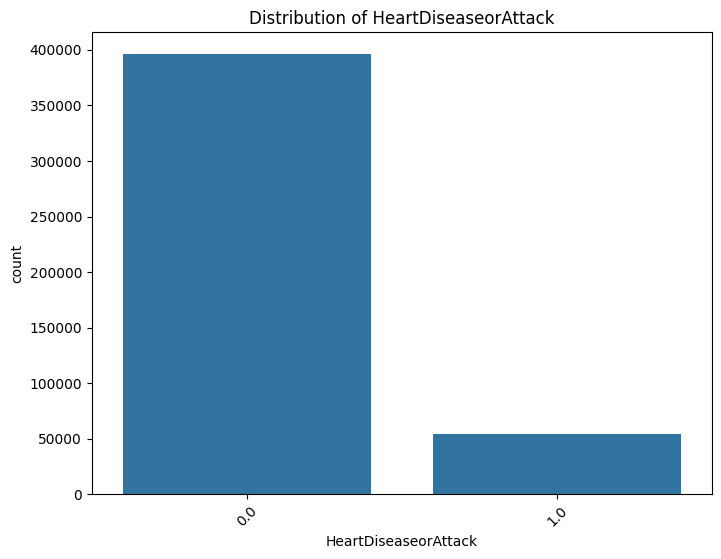

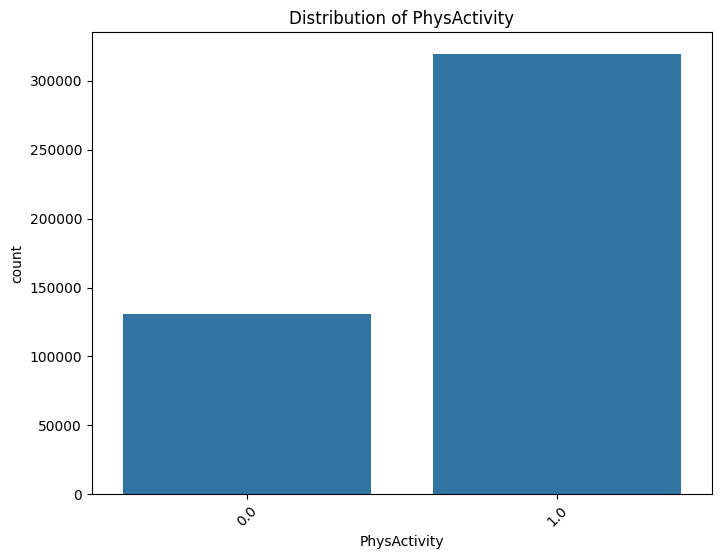

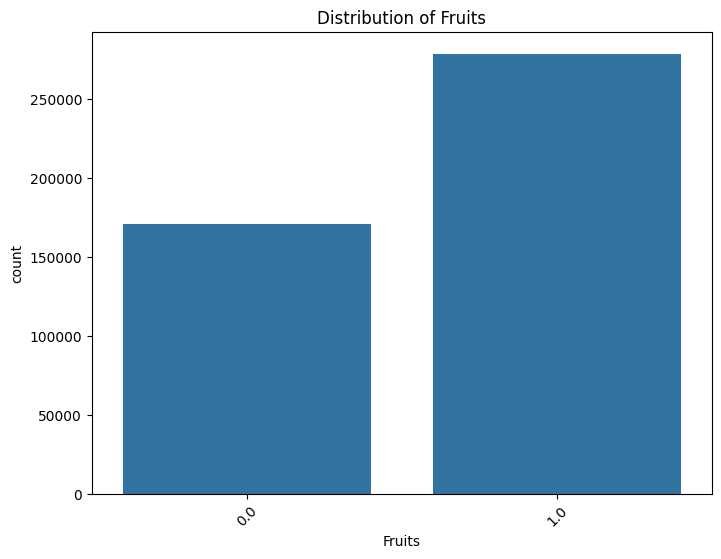

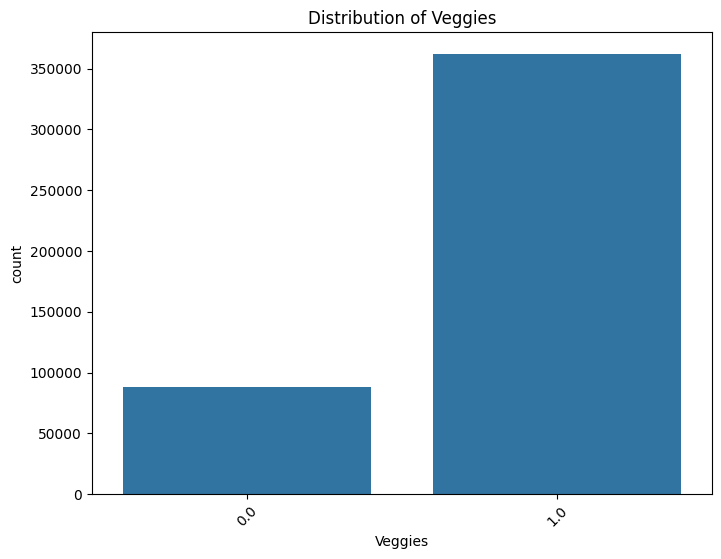

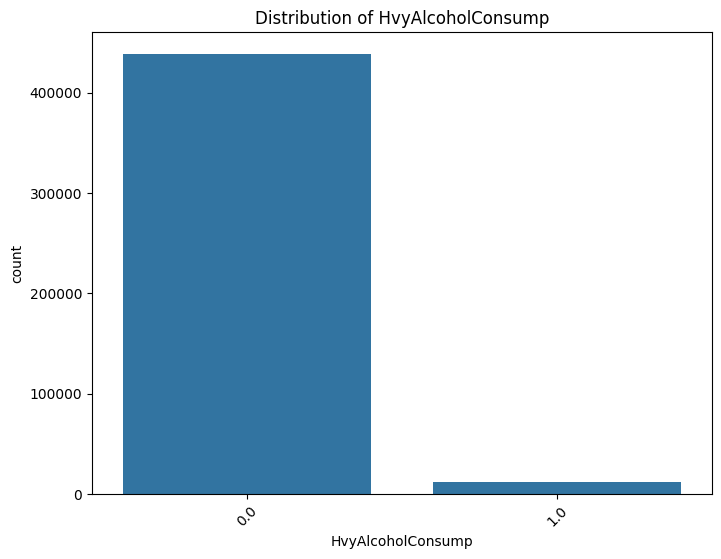

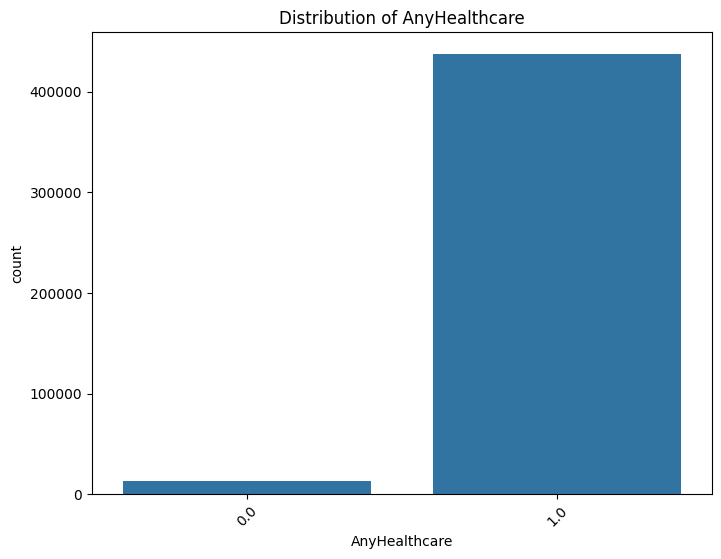

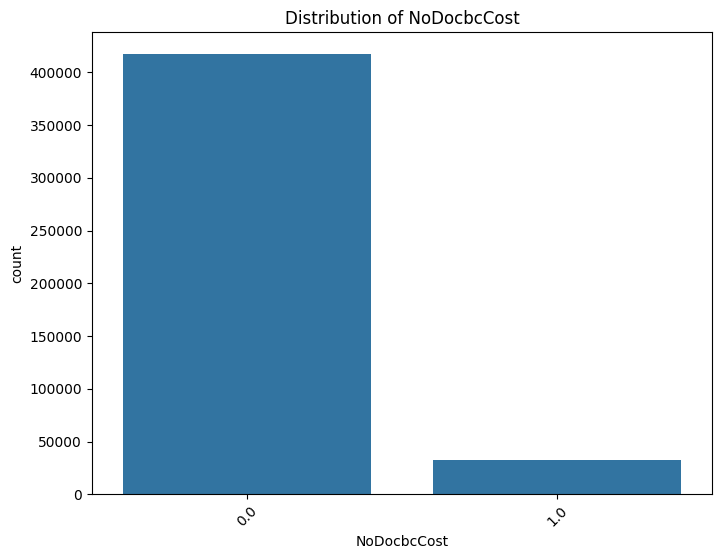

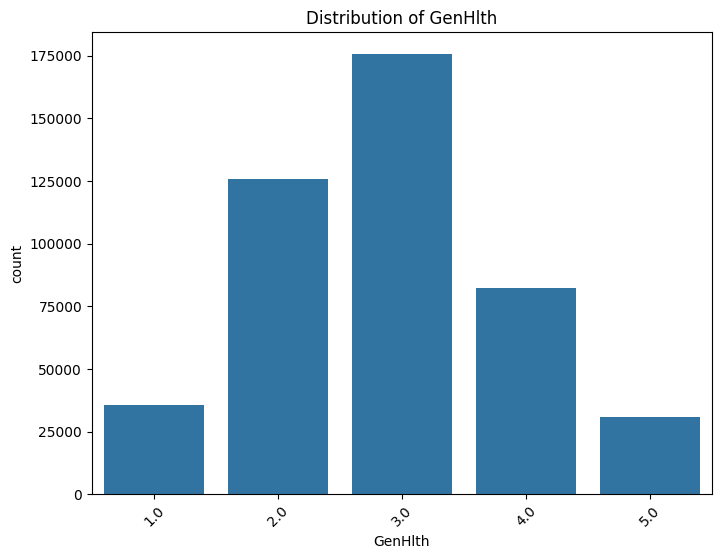

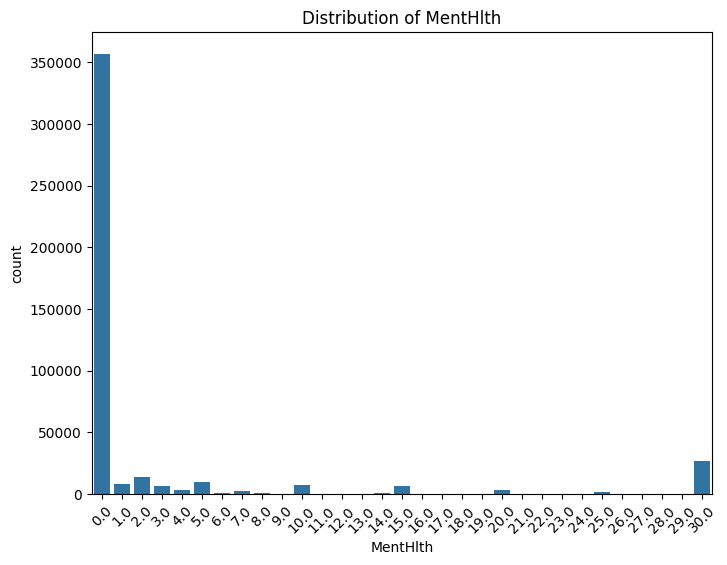

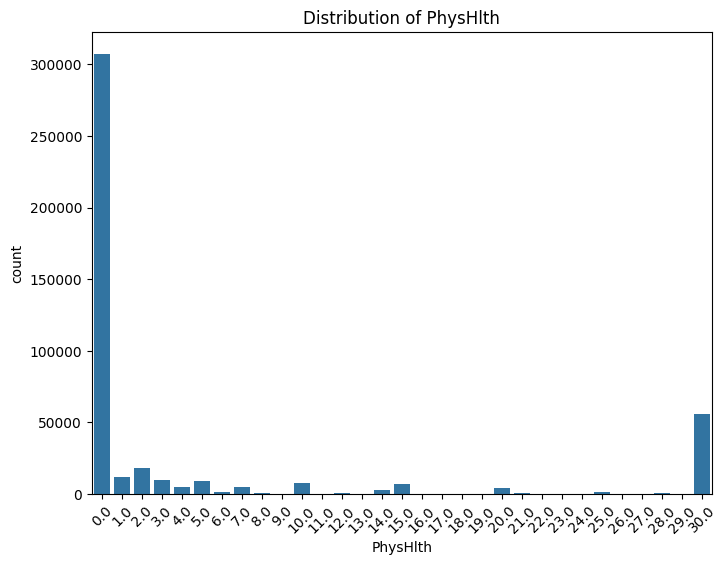

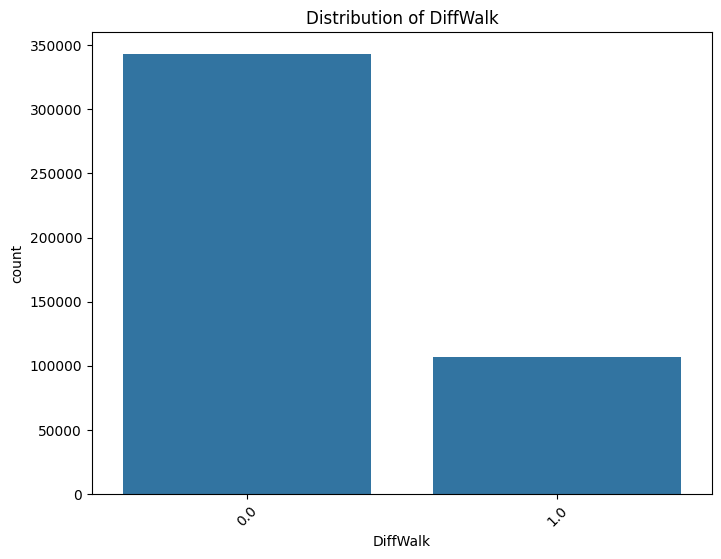

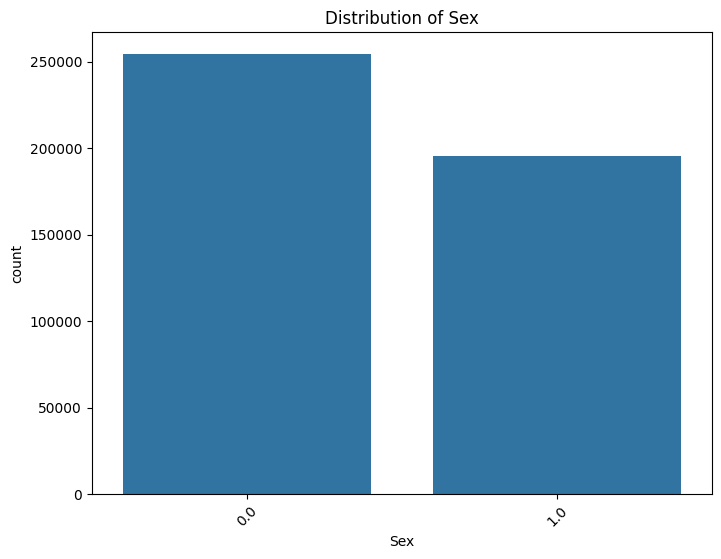

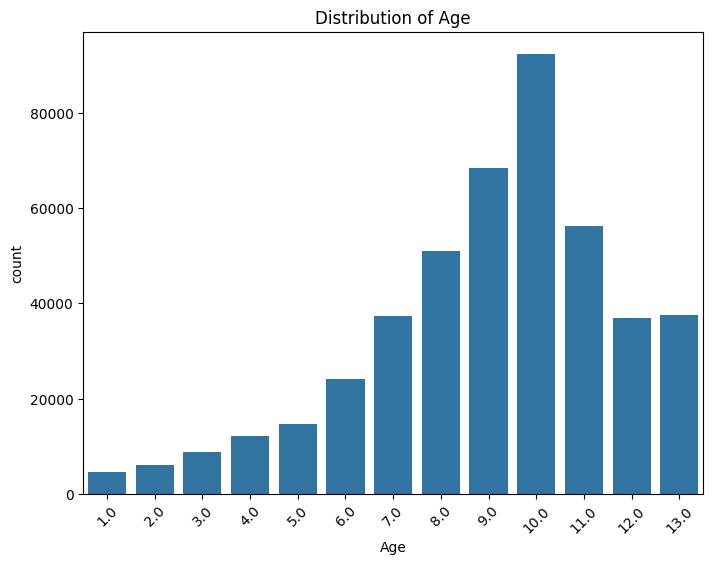

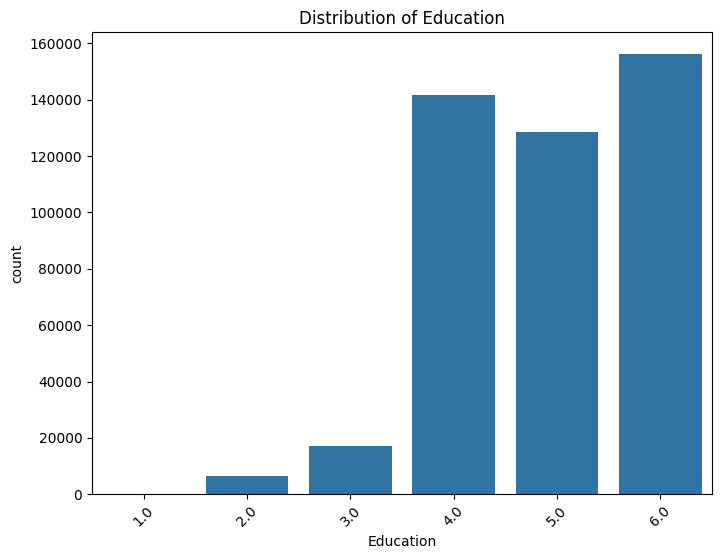

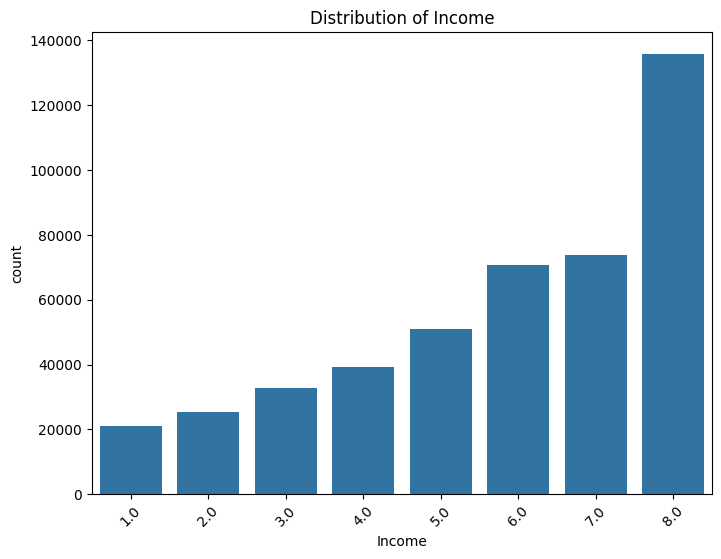

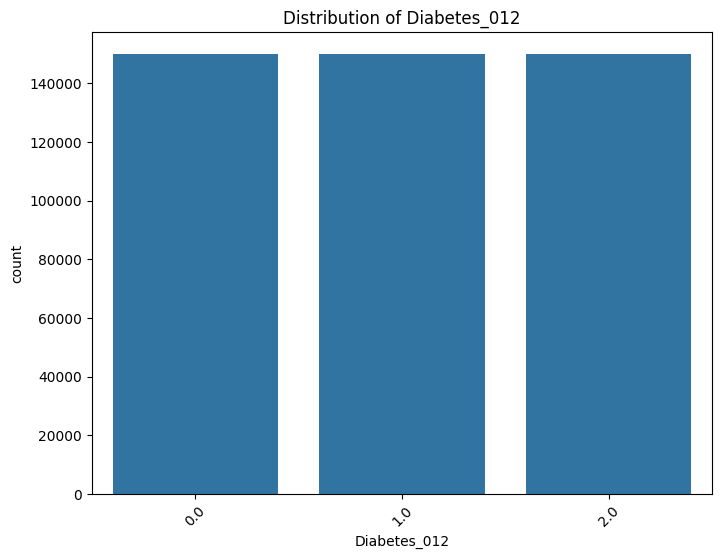

In [44]:
# Plot each feature to show distribution

for col in resampled_df.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=resampled_df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

A lot of the 'issues' in these visualizations are mere class inbalances in some features across the dataset. Although this is treated as a problem and addressed effectively, in this case, and after several rounds of testing later, that these inbalances dont affect the overall performance of the models where they predict with high accuracy and generlize will enough to unseen data.

### Feature Selection

In this section we prepare the final dataset that will be used in out models by carefully selecting the appropriate features that best predict the outcome of a model without overfitting it.

To select our features we can try one of following strategies or their combined results and compare:
1. **Filter method:** Correlation-based Feature Selection
2. **Filter method:** Chi-Squared Test (for categorical data)
3. **Embeded method:** Random Forest

#### Filter Method: Correlation-based Feature Selection

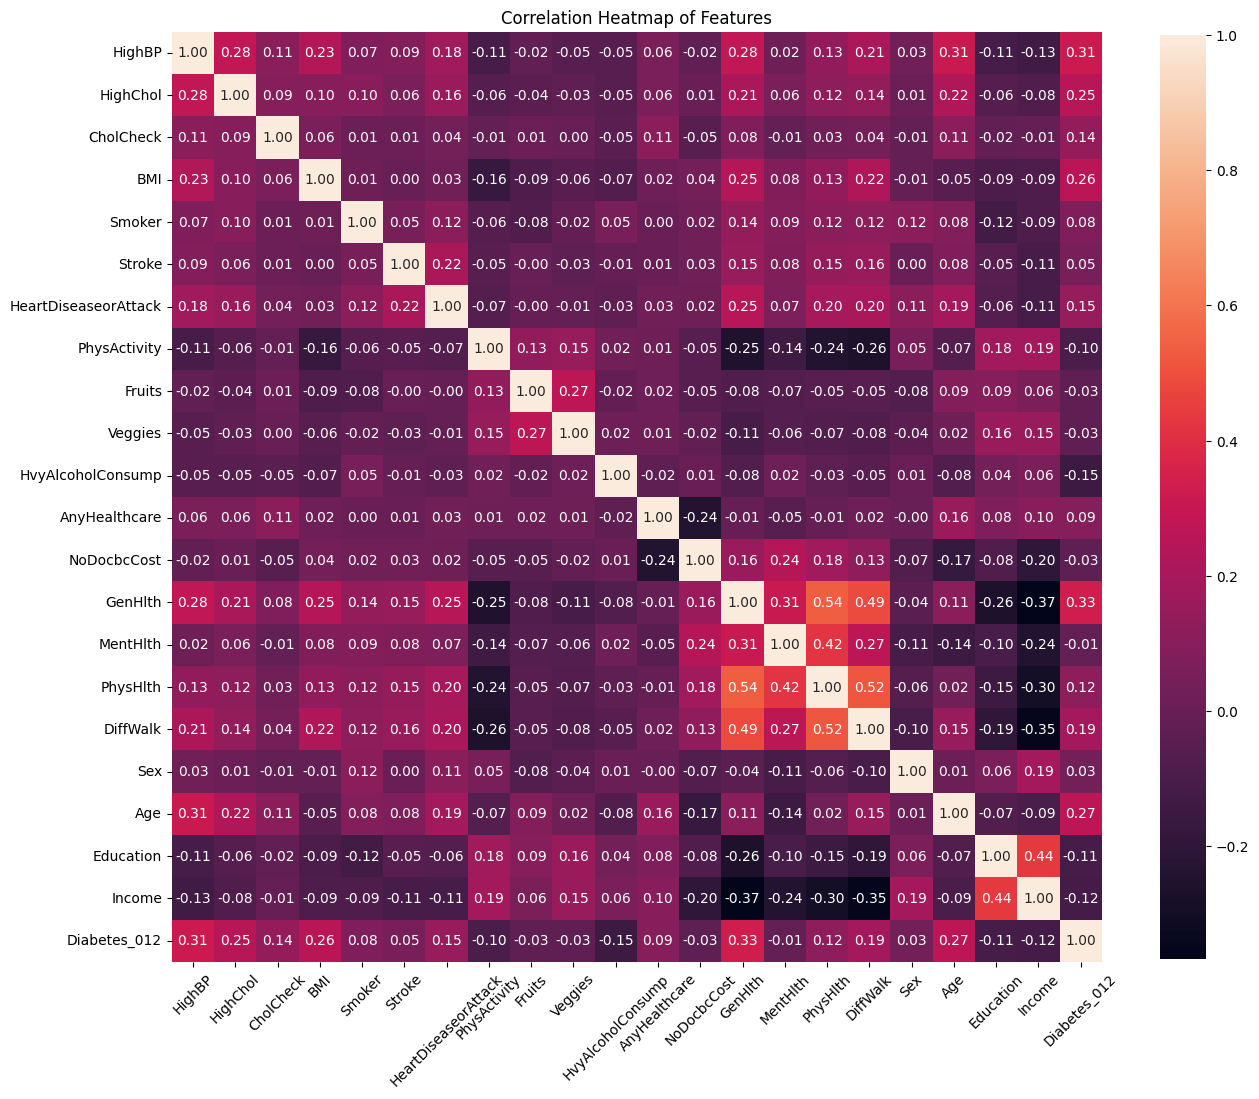

In [45]:
# Calculate and visualize the correlation matrix
correlation_matrix = resampled_df.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Features')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

From the heatmap, we can see that the "GenHlth" and "PhysHlth" columns are the highest correlation with 0.53, followed closely by "PhysHlth" and "DiffWalk" at 0.47, followed by "GenHlth" and "DiffWalk" at 0.46.

However, correlations are not strong enough to consider the information redundant, so other methods are to be utilized.

#### Filter Method: Chi-Squared Test (for categorical data)

In [46]:
# =========== Chi-Squared Feature Selection ===========

"""
The chi-squared test computes a measure of association between each feature and the target variable. 
It judges whether a given feature is independent of the target classes.

The chi-squared score informs how deviated the observed distribution of feature values from its expected distribution. 
The higher it is, the better it will be as a feature to predict.

The p-value indicates whether the relationship is statistically significant. Probability it is a coincedence.
"""

# Apply Chi-Squared test
x = resampled_df.drop(columns=['Diabetes_012'])
y = resampled_df['Diabetes_012']
chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(x, y)


SelectKBest(k='all', score_func=<function chi2 at 0x0000020620779EE0>)

In [47]:
# Get Chi-Squared scores and p-values
chi2_scores = chi2_selector.scores_
p_values = chi2_selector.pvalues_

chi2_results = pd.DataFrame({'Feature': x.columns, 'Chi2 Score': chi2_scores, 'P-Value': p_values})
chi2_results = chi2_results.sort_values(by='Chi2 Score', ascending=False)

print(chi2_results)

                 Feature     Chi2 Score        P-Value
15              PhysHlth  166131.563200   0.000000e+00
18                   Age   32821.263336   0.000000e+00
14              MentHlth   28415.590035   0.000000e+00
0                 HighBP   18511.863612   0.000000e+00
13               GenHlth   18088.882277   0.000000e+00
1               HighChol   14282.470257   0.000000e+00
10     HvyAlcoholConsump   14007.783634   0.000000e+00
16              DiffWalk   12937.154331   0.000000e+00
6   HeartDiseaseorAttack   11389.530029   0.000000e+00
3                    BMI   10842.713245   0.000000e+00
5                 Stroke    5258.020925   0.000000e+00
20                Income    4920.219325   0.000000e+00
4                 Smoker    1400.865687  6.395598e-305
7           PhysActivity    1313.662994  5.517030e-286
19             Education    1146.529566  1.082102e-249
12           NoDocbcCost     625.299652  1.651604e-136
17                   Sex     386.779026   1.028020e-84
2         

In [48]:
# Select top k features
top_k = 20
top_chi_features = chi2_results.head(top_k)['Feature'].values
print(f"Final {top_k} Selected Features:\n", top_chi_features)


Final 20 Selected Features:
 ['PhysHlth' 'Age' 'MentHlth' 'HighBP' 'GenHlth' 'HighChol'
 'HvyAlcoholConsump' 'DiffWalk' 'HeartDiseaseorAttack' 'BMI' 'Stroke'
 'Income' 'Smoker' 'PhysActivity' 'Education' 'NoDocbcCost' 'Sex'
 'CholCheck' 'AnyHealthcare' 'Fruits']


#### Embeded Method: Random Forest


In [49]:
# =========== Random Forest Feature Selection ===========

# Train, test and fit on a simple Random Forest model
x = resampled_df.drop(columns=['Diabetes_012'])
y = resampled_df['Diabetes_012']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [50]:
# Get feature importances from Random Forest

feature_importances = model.feature_importances_
importances = pd.DataFrame({'Feature': x.columns, 'RF Importance': feature_importances})
importances = importances.sort_values(by='RF Importance', ascending=False)
print("Random Forest Feature Importances:\n", importances)

Random Forest Feature Importances:
                  Feature  RF Importance
18                   Age       0.178034
20                Income       0.129353
19             Education       0.086102
3                    BMI       0.082171
13               GenHlth       0.075850
15              PhysHlth       0.060339
14              MentHlth       0.050515
8                 Fruits       0.040621
4                 Smoker       0.040579
17                   Sex       0.038645
7           PhysActivity       0.034667
0                 HighBP       0.034134
9                Veggies       0.030310
1               HighChol       0.030132
16              DiffWalk       0.022664
6   HeartDiseaseorAttack       0.016113
12           NoDocbcCost       0.014097
10     HvyAlcoholConsump       0.011990
5                 Stroke       0.008979
2              CholCheck       0.007524
11         AnyHealthcare       0.007182


In [51]:
# Select top k features
top_k = 17
top_rf_features = importances.head(top_k)['Feature'].values
print(f"Final {top_k} Selected Features:\n", top_rf_features)

Final 17 Selected Features:
 ['Age' 'Income' 'Education' 'BMI' 'GenHlth' 'PhysHlth' 'MentHlth' 'Fruits'
 'Smoker' 'Sex' 'PhysActivity' 'HighBP' 'Veggies' 'HighChol' 'DiffWalk'
 'HeartDiseaseorAttack' 'NoDocbcCost']


#### Combined Features

In [52]:
# =========== Combine Common Features from All Methods ===========
common_features = set(top_chi_features) & set(top_rf_features)
print("Final Selected Common Features:\n", common_features)


Final Selected Common Features:
 {'MentHlth', 'HighBP', 'Income', 'BMI', 'Sex', 'HeartDiseaseorAttack', 'Age', 'NoDocbcCost', 'Smoker', 'Education', 'GenHlth', 'PhysHlth', 'Fruits', 'PhysActivity', 'HighChol', 'DiffWalk'}


# Model Training and Evaluation

As we finally arrive at the meat and bone of our work, we need to address a couple of things to justify what comes later.

The domain of this dataset is a medical - one where there is a diagnosis of a disease that can put lives in danger if misdiagnosed.

As such, the goal of this training is to **increase the recall** (False Negatives) for classes 1 and 2, representing 'prediabetes' and 'diabetes' respectively.

Methodology:

- Implement different models (Random Forest, Decision Tree, LightGBM, Logistic Regression)

- Hyperparameter Tuning ( Perform grid search or random search for hyperparameter optimization )

- Display Learning Curve for each to detect bias/variance

- Generate 3 versions of each model to show performance change
    - Without feature selection and hyperparameters
    - Without feature selection, but with hyperparameters
    - With feature selection and Hyperparameters

- Evaluate performance: accuracy, precision, recall, F1-score, and ROC-AUC

- Confusion Matrix (Goal to have minimal false negatives)

### Helper Functions and Variables

In [53]:
# Store metrics for each model
models={}

In [54]:
# Plot learning curve
def plot_learning_curve(model, x, y, title):
    # Using stratified k-fold to avoid errors when running logistic regression
    stratified_kfold = StratifiedKFold(n_splits=5)

    train_sizes, train_scores, test_scores = learning_curve(
        model, x, y, cv=stratified_kfold, scoring='accuracy', n_jobs=-1,
        train_sizes=[0.2, 0.4, 0.6, 0.8, 1]
    )

    train_accuracy_mean = np.mean(train_scores, axis=1)
    test_accuracy_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_accuracy_mean, marker='o', linestyle='-', color='royalblue',
             linewidth=2, markersize=8, label='Training Accuracy')
    plt.plot(train_sizes, test_accuracy_mean, marker='s', linestyle='--', color='orange',
             linewidth=2, markersize=8, label='Validation Accuracy')

    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Training Sizes', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc='best', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [55]:
# Print results and store metrics for each model in a dictionary for later comparison
def evaluate_model(model_name, y_test, y_pred,):
    models[model_name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1_score': f1_score(y_test, y_pred, average='weighted')
    }
    
    # Display Results
    print(f"Metrics for {model_name}:")
    for metric, value in models[model_name].items():
        print(f"{metric.capitalize()}: {value:.4f}")

    print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [56]:
# Plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, class_names=['Class 0', 'Class 1', 'Class 2']):
    plt.figure(figsize=(10, 7))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

In [68]:
def plot_roc_curves(clfs):
    x = resampled_df.drop(columns=['Diabetes_012'])
    y = resampled_df['Diabetes_012'].astype(int)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

    # Binarize the multiclass target variable with a One vs. Rest approach
    y_train_bin = label_binarize(y_train, classes=np.unique(y))
    y_test_bin = label_binarize(y_test, classes=np.unique(y))

    # Plot ROC curves for each class of each classifier
    plt.figure(figsize=(8, 6))
    for j, clf in enumerate(clfs):
        clf.fit(X_train, y_train)
        for i in range(y_train_bin.shape[1]):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], clf.predict_proba(X_test)[:, i])
            plt.plot(fpr, tpr, label=f'{j}.{clf.__class__.__name__} Class {i} (AUC = {auc(fpr, tpr):0.2f})')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.title('ROC Curve Comparison')
    plt.savefig('roc_comparison.png')


## Model 1: Random Forest

### Random Forest ( Without Feature Selection and Hyperparameters)


In [57]:
# Train/Test Split
x = resampled_df.drop(columns=['Diabetes_012'])
y = resampled_df['Diabetes_012'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y )

In [ ]:
# Model Setup
model = RandomForestClassifier(n_jobs=-1)

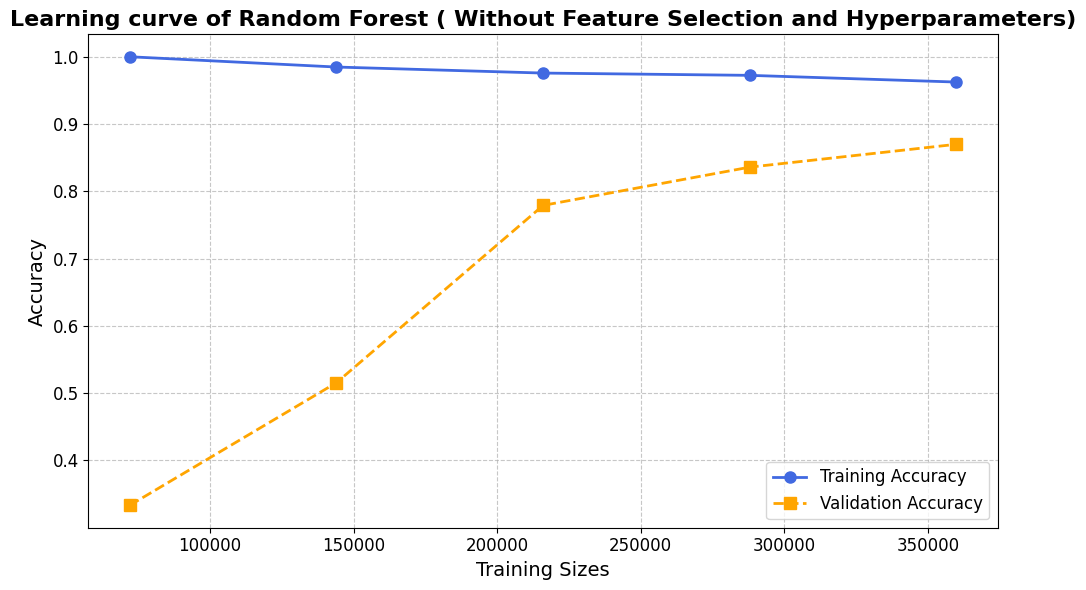

In [59]:
# Learning Curve
plot_learning_curve(model, x, y, title="Learning curve of Random Forest ( Without Feature Selection and Hyperparameters)")

In [60]:
# Model Fitting
model.fit(X_train, y_train)

RandomForestClassifier()

In [61]:
# Evaluate Model
y_pred = model.predict(X_test)
evaluate_model("RF_WFS_WHP", y_test,y_pred)

Metrics for RF_WFS_WHP:
Accuracy: 0.8714
Precision: 0.8714
Recall: 0.8714
F1_score: 0.8706

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.80      0.83     45000
           1       0.93      0.96      0.95     44999
           2       0.82      0.85      0.84     45000

    accuracy                           0.87    134999
   macro avg       0.87      0.87      0.87    134999
weighted avg       0.87      0.87      0.87    134999



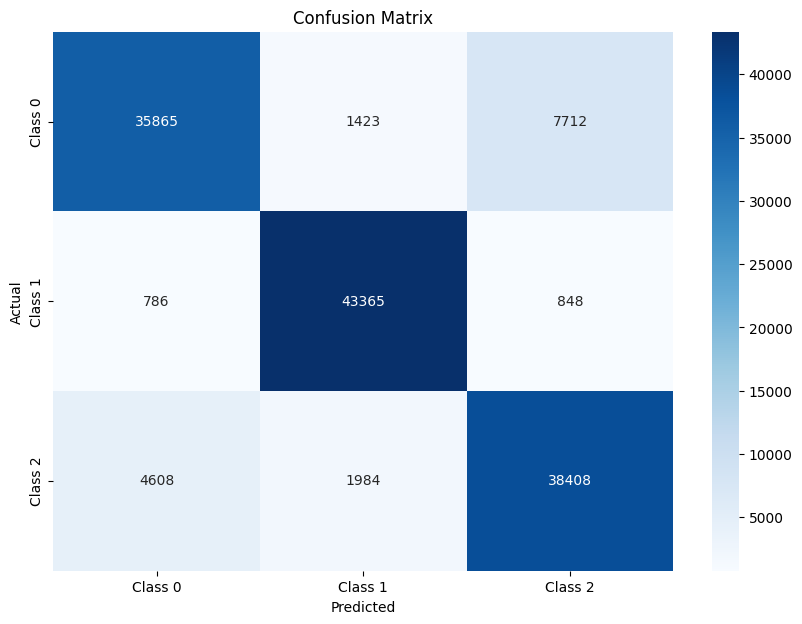

In [62]:
# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred)

### Random Forest ( Without Feature Selection )


In [67]:
# Train/Test Split
x = resampled_df.drop(columns=['Diabetes_012'])
y = resampled_df['Diabetes_012'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y )

In [ ]:
# Model Setup
"""
Parameters were chosen mostly by grid search, however, because learning curve showed signs of overfitting
setting depth to low value as well as larger leaf size and max_features adds diversity and more
generalization going forward
"""
model = RandomForestClassifier(
    random_state=42,
    max_depth=25,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='log2',
    n_estimators=150,
    n_jobs=-1,
    class_weight={0: 1, 1: 2, 2: 3}
)

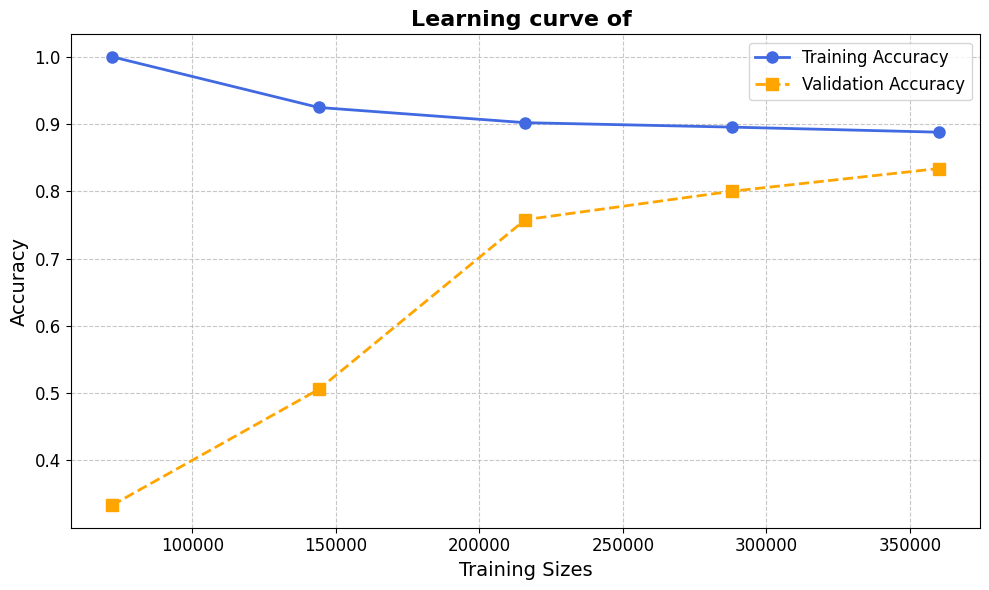

In [ ]:
# Learning Curve
plot_learning_curve(model, x, y, title="Learning curve of Random Forest ( Without Feature Selection )")

In [76]:
# Model Fitting
model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 2, 2: 3}, max_depth=20,
                       random_state=42)

In [ ]:
# Hyperparameter Tuning
"""
param_dist = {
    'max_depth': [25, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'n_estimators': [100, 150],
    'max_features': ['sqrt', 'log2']
}
random_search = RandomizedSearchCV(model, param_dist, n_iter=100, scoring='recall', cv=5, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)
best_params = random_search.best_params_
print("Best Parameters:", best_params)"""


Best Parameters: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 25}


In [77]:
# Evaluate Model
y_pred = model.predict(X_test)
evaluate_model("RF_WFS", y_test,y_pred)

Metrics for RF_WFS:
Accuracy: 0.8155
Precision: 0.8282
Recall: 0.8155
F1_score: 0.8141

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.67      0.77     45000
           1       0.86      0.91      0.88     44999
           2       0.72      0.86      0.79     45000

    accuracy                           0.82    134999
   macro avg       0.83      0.82      0.81    134999
weighted avg       0.83      0.82      0.81    134999



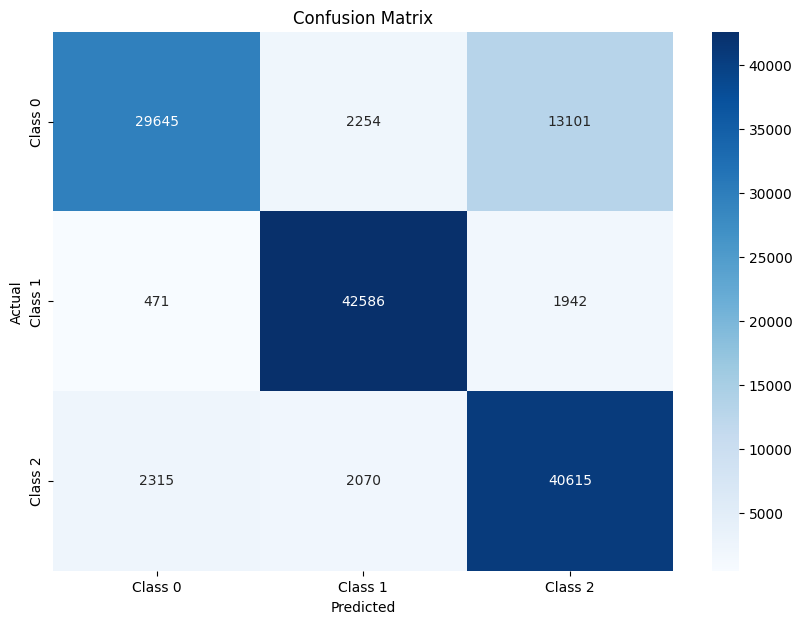

In [ ]:
# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred)

### Random Forest ( With Feature Selection )


In [ ]:
# Train/Test Split
x = resampled_df[list(common_features)] 
y = resampled_df['Diabetes_012'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
# Model Setup

model = RandomForestClassifier(
    random_state=42,
    max_depth=25,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='log2',
    n_estimators=150,
    n_jobs=-1,
    class_weight={0: 1, 1: 2, 2: 3}
)

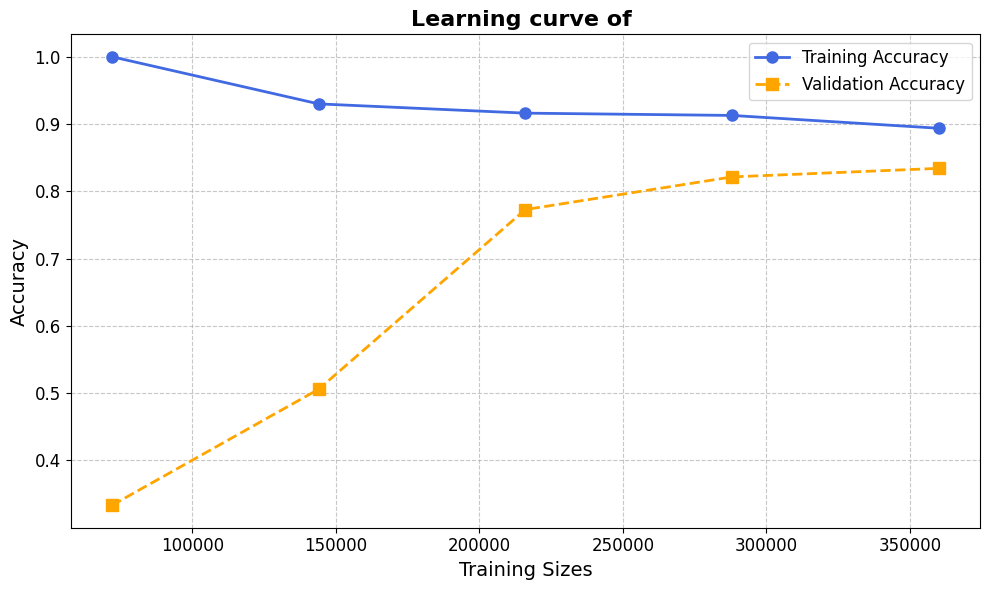

In [ ]:
# Learning Curve
plot_learning_curve(model, x, y, title="Learning curve of Random Forest ( With Feature Selection and Hyperparameter)")

In [ ]:
# Model Fitting
model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 2, 2: 3}, max_depth=25,
                       max_features='log2', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=150, random_state=42)

In [ ]:
# Hyperparameter Tuning
"""
param_dist = {
    'max_depth': [25, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'n_estimators': [100, 150],
    'max_features': ['sqrt', 'log2']
}
random_search = RandomizedSearchCV(model, param_dist, n_iter=100, scoring='recall', cv=5, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)
best_params = random_search.best_params_
print("Best Parameters:", best_params)
"""

Best Parameters: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 25}


In [ ]:
# Evaluate Model
y_pred = model.predict(X_test)
evaluate_model("RF_FS", y_test,y_pred)

Metrics for RF_FS:
Accuracy: 0.8354
Precision: 0.8466
Recall: 0.8354
F1_score: 0.8330

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.67      0.77     44844
           1       0.90      0.94      0.92     44952
           2       0.74      0.89      0.81     45203

    accuracy                           0.84    134999
   macro avg       0.85      0.84      0.83    134999
weighted avg       0.85      0.84      0.83    134999



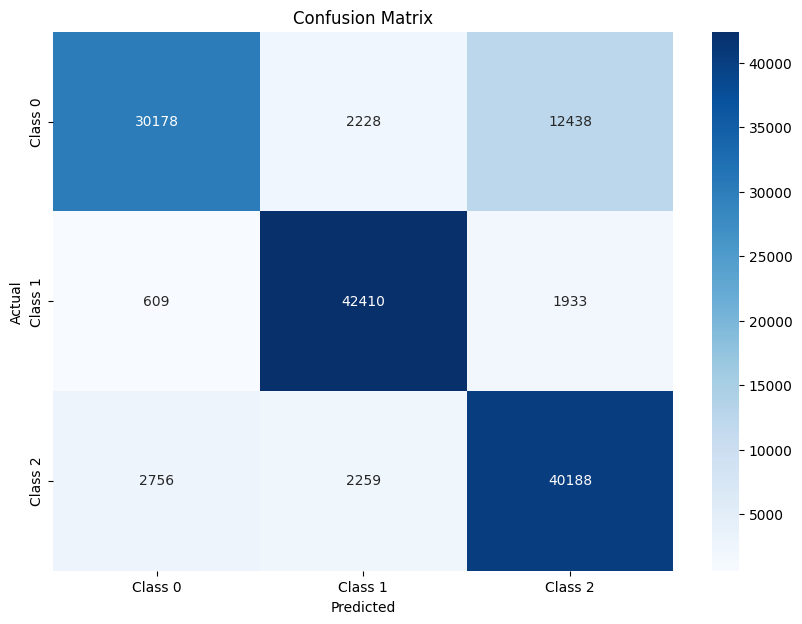

In [ ]:
# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### Random Forest ROC Curves

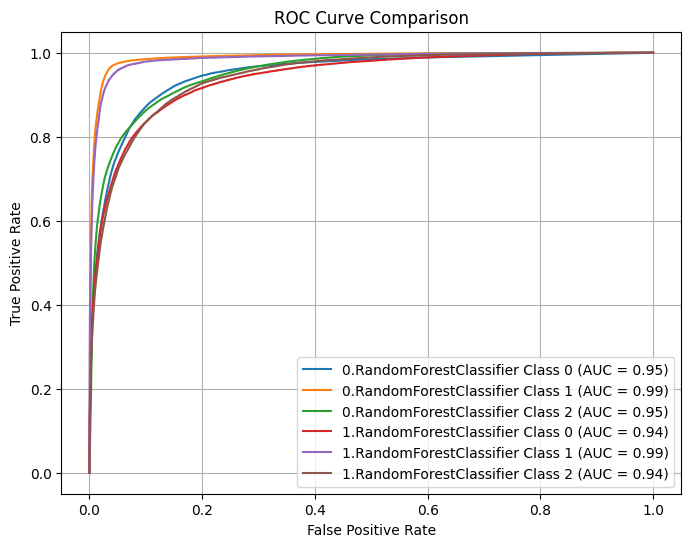

In [69]:
# Plot ROC curves with and without hyperparameters
clfs = [
    RandomForestClassifier(n_jobs=-1),
    RandomForestClassifier(
    random_state=42,
    max_depth=25,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='log2',
    n_estimators=150,
    n_jobs=-1,
    class_weight={0: 1, 1: 2, 2: 3}
) ]
plot_roc_curves(clfs)


## Model 2: DecisionTree

### Decision Tree ( Without Feature Selection and Hyperparameters)


In [ ]:
# Train/Test Split
x = resampled_df.drop(columns=['Diabetes_012'])
y = resampled_df['Diabetes_012'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y )

In [ ]:
# Model Setup
model = DecisionTreeClassifier()

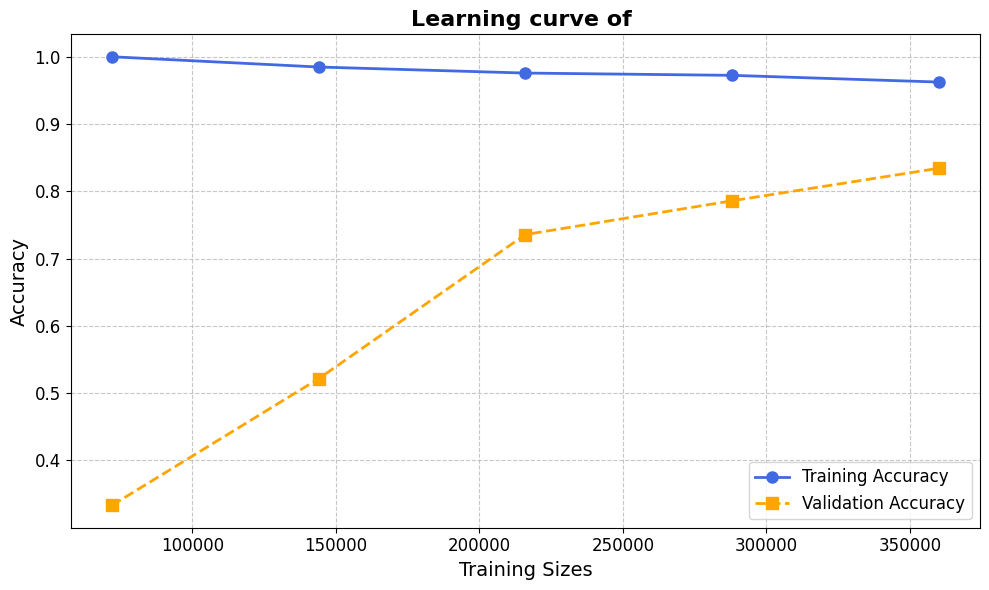

In [ ]:
# Learning Curve
plot_learning_curve(model, x, y, title="Learning curve of Decision Tree ( Without Feature Selection and Hyperparameters)")

In [ ]:
# Model Fitting
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Evaluate Model
y_pred = model.predict(X_test)
evaluate_model("DT_WFS_WHP", y_test,y_pred)

Metrics for DT_WFS_WHP:
Accuracy: 0.8294
Precision: 0.8283
Recall: 0.8294
F1_score: 0.8268

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.72      0.77     45000
           1       0.88      0.96      0.92     44999
           2       0.78      0.80      0.79     45000

    accuracy                           0.83    134999
   macro avg       0.83      0.83      0.83    134999
weighted avg       0.83      0.83      0.83    134999



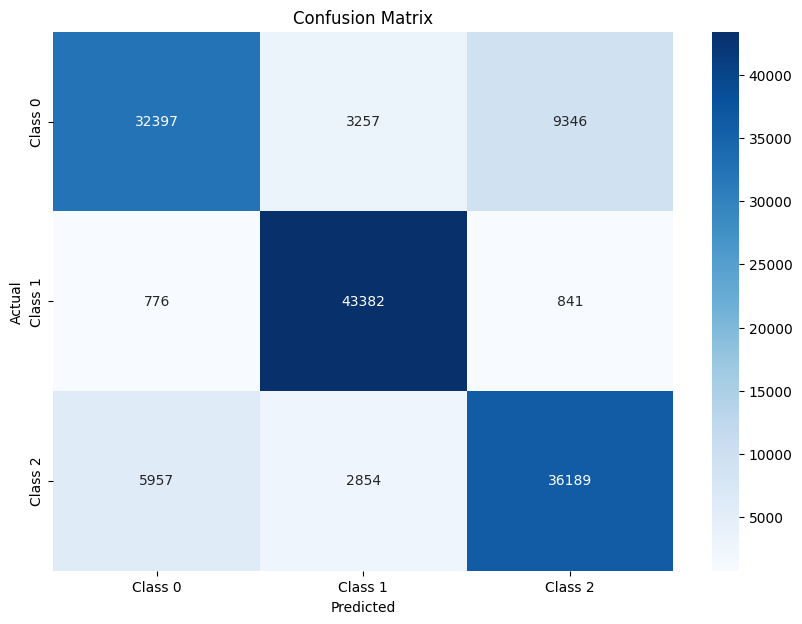

In [ ]:
# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred)

### Decision Tree ( Without Feature Selection )


In [ ]:
# Train/Test Split
x = resampled_df.drop(columns=['Diabetes_012'])
y = resampled_df['Diabetes_012'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y )

In [ ]:
# Model Setup

model = DecisionTreeClassifier(
    random_state=42,
    max_depth=30,
    min_samples_split=3,
    min_samples_leaf=3,
    max_features=None,
    class_weight={0: 1, 1: 2, 2: 4}
)

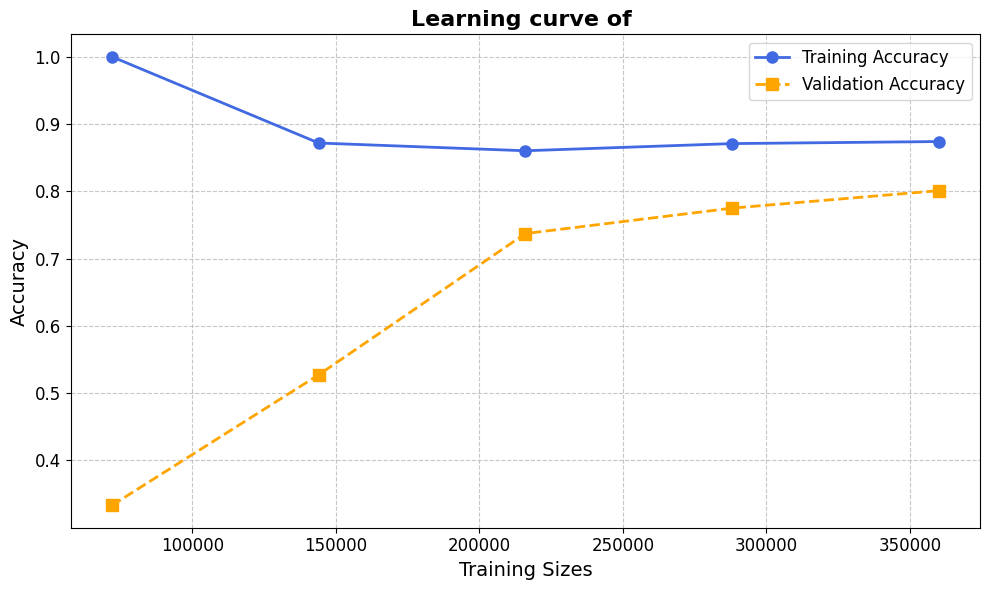

In [ ]:
# Learning Curve
plot_learning_curve(model, x, y, title="Learning curve of Decision Tree ( Without Feature Selection )")

In [ ]:
# Model Fitting
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 2, 2: 4}, max_depth=30,
                       min_samples_leaf=3, min_samples_split=3,
                       random_state=42)

In [ ]:
# Hyperparameter Tuning
"""
param_dist = {
    'max_depth': [20, 30],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2'],
}

random_search = RandomizedSearchCV(model, param_dist, n_iter=100, scoring='recall', cv=5, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)
best_params = random_search.best_params_
print("Best Parameters:", best_params)
"""

Best Parameters: {'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 30}


In [ ]:
# Evaluate Model
y_pred = model.predict(X_test)
evaluate_model("DT_WFS", y_test,y_pred)

Metrics for DT_WFS:
Accuracy: 0.7978
Precision: 0.8130
Recall: 0.7978
F1_score: 0.7923

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.59      0.71     45000
           1       0.86      0.93      0.90     44999
           2       0.70      0.87      0.77     45000

    accuracy                           0.80    134999
   macro avg       0.81      0.80      0.79    134999
weighted avg       0.81      0.80      0.79    134999



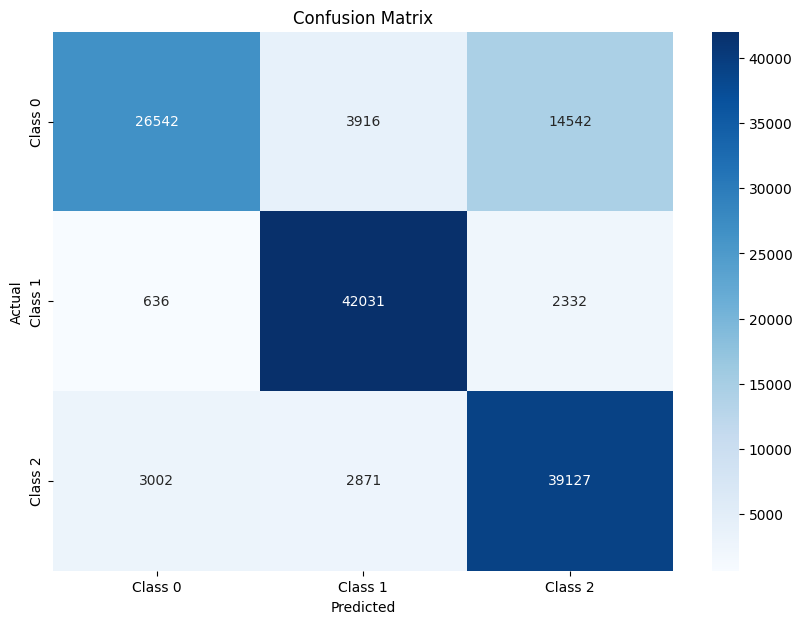

In [ ]:
# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred)

### Decision Tree ( With Feature Selection )


In [ ]:
# Train/Test Split
x = resampled_df[list(common_features)] 
y = resampled_df['Diabetes_012'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y )

In [ ]:
# Model Setup

model = DecisionTreeClassifier(
    random_state=42,
    max_depth=30,
    min_samples_split=3,
    min_samples_leaf=3,
    max_features=None,
    class_weight={0: 1, 1: 2, 2: 4}
)

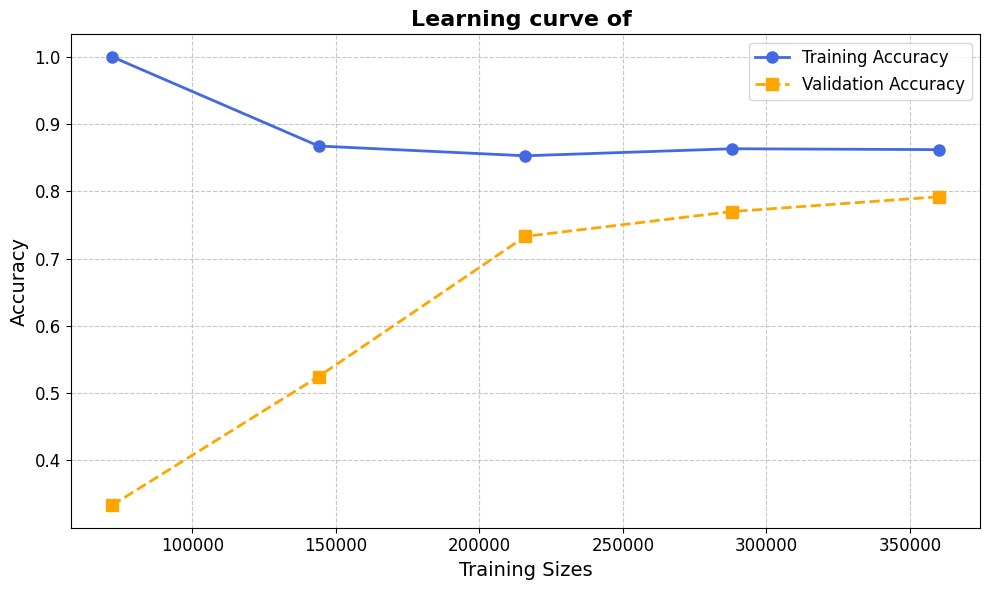

In [ ]:
# Learning Curve
plot_learning_curve(model, x, y, title="Learning curve of Decision Tree ( With Feature Selection and Hyperparameters)")

In [ ]:
# Model Fitting
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 2, 2: 4}, max_depth=30,
                       min_samples_leaf=3, min_samples_split=3,
                       random_state=42)

In [ ]:
# Hyperparameter Tuning
"""
param_dist = {
    'max_depth': [20, 30],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2'],
}

random_search = RandomizedSearchCV(model, param_dist, n_iter=100, scoring='recall', cv=5, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)
best_params = random_search.best_params_
print("Best Parameters:", best_params)
"""

Best Parameters: {'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 30}


In [ ]:
# Evaluate Model
y_pred = model.predict(X_test)
evaluate_model("DT_FS", y_test,y_pred)

Metrics for DT_FS:
Accuracy: 0.7879
Precision: 0.8053
Recall: 0.7879
F1_score: 0.7820

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.57      0.70     45000
           1       0.85      0.92      0.88     44999
           2       0.69      0.87      0.77     45000

    accuracy                           0.79    134999
   macro avg       0.81      0.79      0.78    134999
weighted avg       0.81      0.79      0.78    134999



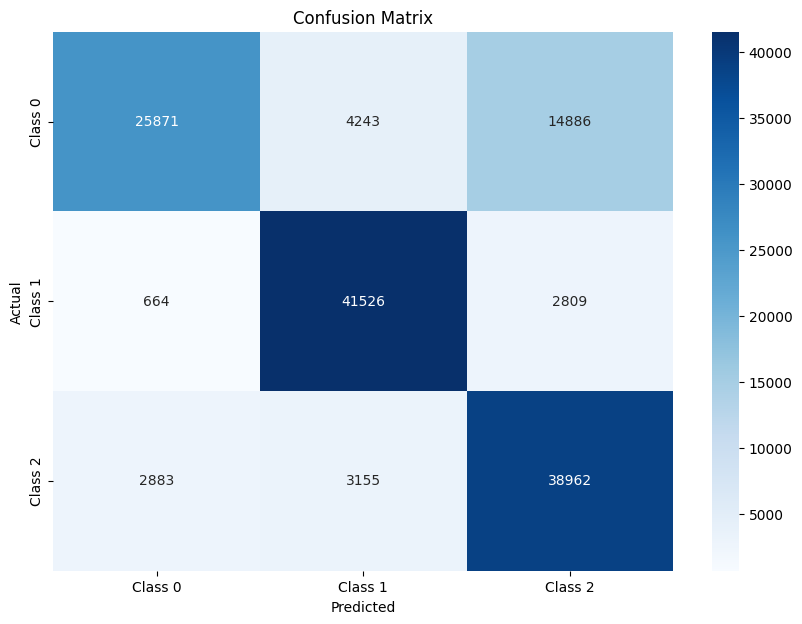

In [ ]:
# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred)

### Decision Tree ROC Curves


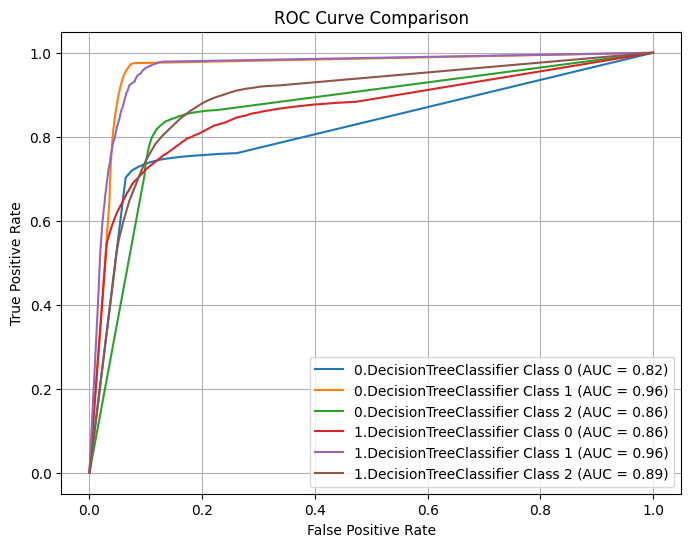

In [70]:
# Plot ROC curves with and without hyperparameters
clfs = [
    DecisionTreeClassifier(),
    DecisionTreeClassifier(
    random_state=42,
    max_depth=30,
    min_samples_split=3,
    min_samples_leaf=3,
    max_features=None,
    class_weight={0: 1, 1: 2, 2: 4}
)]
plot_roc_curves(clfs)


## Model 3: LightGBM

### LightGBM ( Without Feature Selection and Hyperparameters)


In [ ]:
# Train/Test Split
x = resampled_df.drop(columns=['Diabetes_012'])
y = resampled_df['Diabetes_012'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y )

In [ ]:
# Model Setup

model = LGBMClassifier()


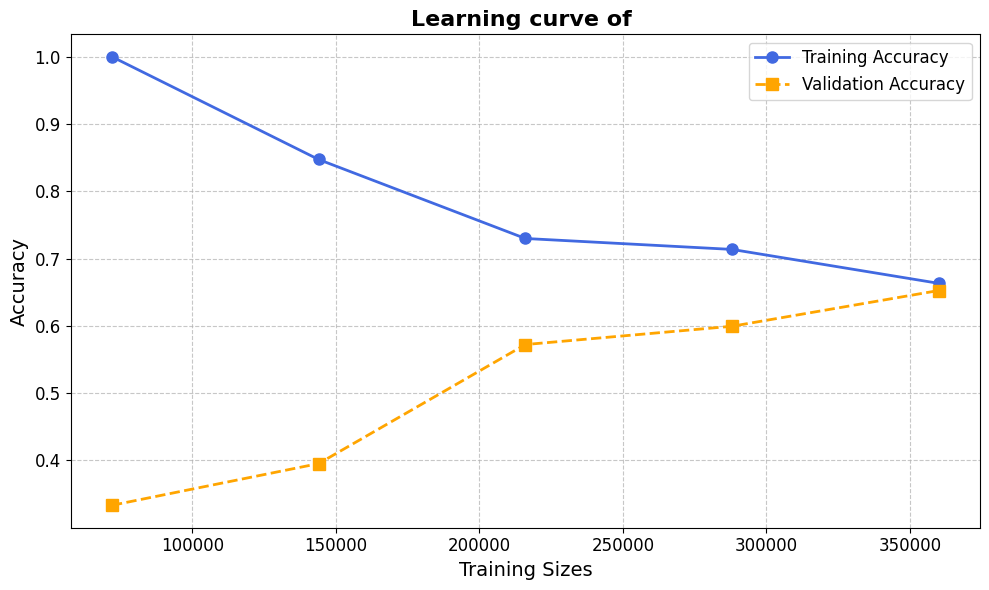

In [ ]:
# Learning Curve
plot_learning_curve(model, x, y, title="Learning curve of LightGBM ( Without Feature Selection and Hyperparameters)")

In [ ]:
# Model Fitting
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018921 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 144
[LightGBM] [Info] Number of data points in the train set: 314996, number of used features: 21
[LightGBM] [Info] Start training from score -1.098600
[LightGBM] [Info] Start training from score -1.098638
[LightGBM] [Info] Start training from score -1.098600


LGBMClassifier()

In [ ]:
# Evaluate Model
y_pred = model.predict(X_test)
evaluate_model("LGBM_WFS_WHP", y_test,y_pred)

Metrics for LGBM_WFS_WHP:
Accuracy: 0.6574
Precision: 0.6624
Recall: 0.6574
F1_score: 0.6567

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.69      0.72     45000
           1       0.60      0.72      0.66     44999
           2       0.64      0.55      0.59     45000

    accuracy                           0.66    134999
   macro avg       0.66      0.66      0.66    134999
weighted avg       0.66      0.66      0.66    134999



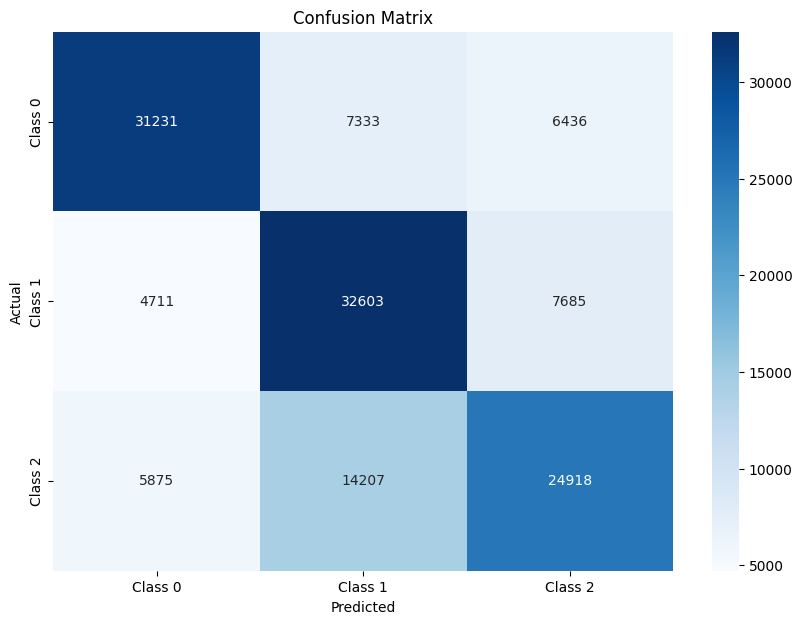

In [ ]:
# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred)

### LightGBM ( Without Feature Selection )


In [ ]:
# Train/Test Split
x = resampled_df.drop(columns=['Diabetes_012'])
y = resampled_df['Diabetes_012'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y )

In [ ]:
# Model Setup

model = LGBMClassifier(
    random_state=42,
    max_depth=30,
    n_estimators=300,
    min_child_samples=2,
    num_leaves=150,
    learning_rate=0.2,
    class_weight={0: 1, 1: 2, 2: 3}
)


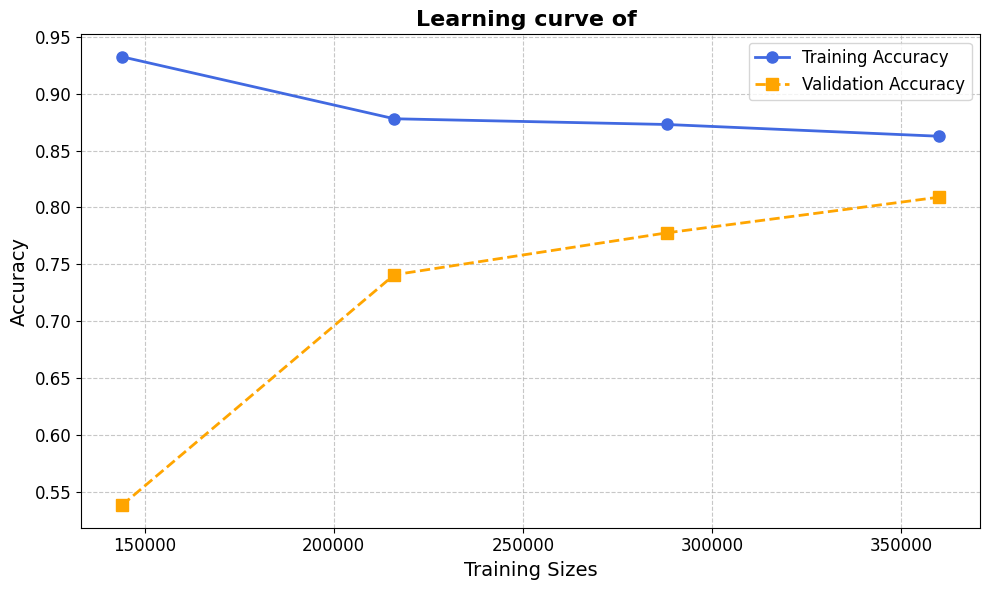

In [ ]:
# Learning Curve
plot_learning_curve(model, x, y, title="Learning curve of LightGBM ( Without Feature Selection )")

In [ ]:
# Model Fitting
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023272 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 145
[LightGBM] [Info] Number of data points in the train set: 314996, number of used features: 21
[LightGBM] [Info] Start training from score -1.791747
[LightGBM] [Info] Start training from score -1.098638
[LightGBM] [Info] Start training from score -0.693134


LGBMClassifier(class_weight={0: 1, 1: 2, 2: 3}, learning_rate=0.2, max_depth=30,
               min_child_samples=2, n_estimators=300, num_leaves=150,
               random_state=42)

In [ ]:
# Hyperparameter Tuning
"""
param_dist = {
    'n_estimators': [50, 150, 300],
    'max_depth': [10, 20, 30],
    'min_child_samples': [1, 2, 5],
    'num_leaves': [50, 100, 150],
    'learning_rate': [0.01, 0.2],
}

random_search = RandomizedSearchCV(model, param_dist, n_iter=100, scoring='recall', cv=5, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)
best_params = random_search.best_params_
print("Best Parameters:", best_params)

"""


Best Parameters: {'num_leaves': 150, 'n_estimators': 300, 'min_child_samples': 2, 'max_depth': 30, 'learning_rate': 0.2}


In [ ]:
# Evaluate Model
y_pred = model.predict(X_test)
evaluate_model("LGBM_WFS", y_test,y_pred)

Metrics for LGBM_WFS:
Accuracy: 0.8140
Precision: 0.8299
Recall: 0.8140
F1_score: 0.8110

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.64      0.74     45000
           1       0.88      0.92      0.90     44999
           2       0.71      0.88      0.79     45000

    accuracy                           0.81    134999
   macro avg       0.83      0.81      0.81    134999
weighted avg       0.83      0.81      0.81    134999



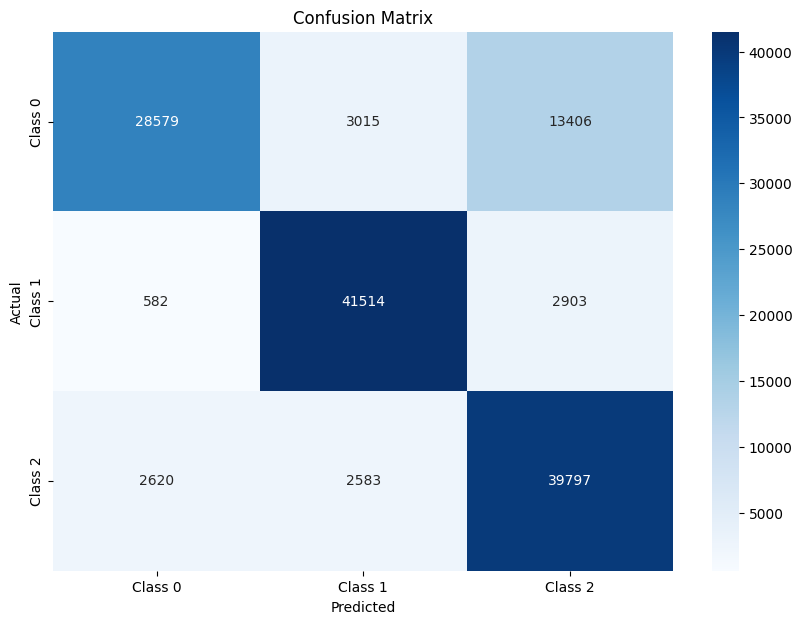

In [ ]:
# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred)

### LightGBM ( With Feature Selection )


In [ ]:
# Train/Test Split
x = resampled_df[list(common_features)]
y = resampled_df['Diabetes_012'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y )

In [ ]:
# Model Setup

model = LGBMClassifier(
    random_state=42,
    max_depth=30,
    n_estimators=300,
    min_child_samples=2,
    num_leaves=150,
    learning_rate=0.2,
    class_weight={0: 1, 1: 2, 2: 3}
)


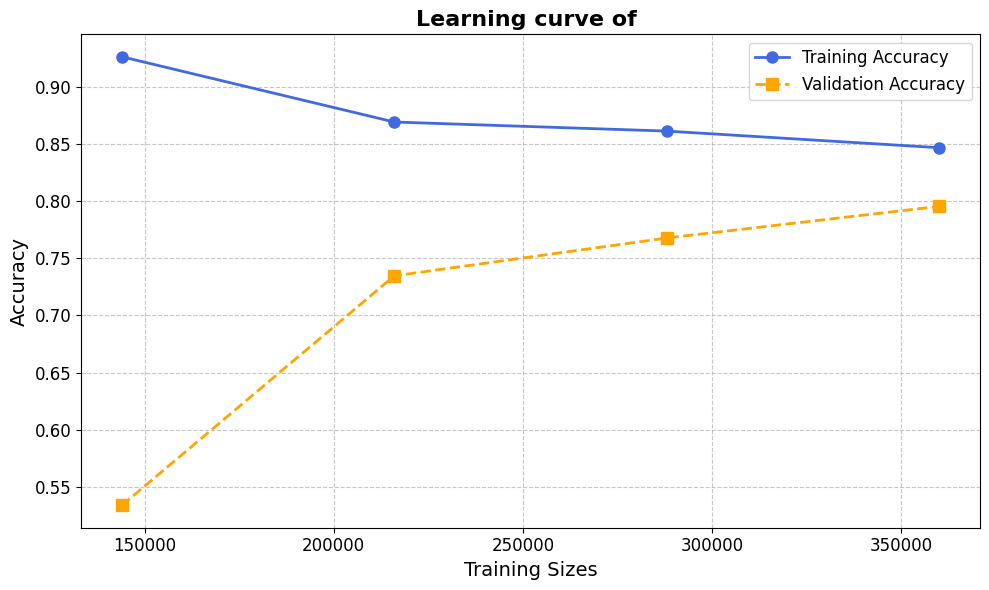

In [ ]:
# Learning Curve
plot_learning_curve(model, x, y, title="Learning curve of LightGBM ( With Feature Selection and Hyperparameters)")

In [ ]:
# Model Fitting
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 130
[LightGBM] [Info] Number of data points in the train set: 314996, number of used features: 16
[LightGBM] [Info] Start training from score -1.791747
[LightGBM] [Info] Start training from score -1.098638
[LightGBM] [Info] Start training from score -0.693134


LGBMClassifier(class_weight={0: 1, 1: 2, 2: 3}, learning_rate=0.2, max_depth=30,
               min_child_samples=2, n_estimators=300, num_leaves=150,
               random_state=42)

In [ ]:
# Hyperparameter Tuning
"""
param_dist = {
    'n_estimators': [50, 150, 300],
    'max_depth': [10, 20, 30],
    'min_child_samples': [1, 2, 5],
    'num_leaves': [50, 100, 150],
    'learning_rate': [0.01, 0.2],
}

random_search = RandomizedSearchCV(model, param_dist, n_iter=100, scoring='recall', cv=5, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)
best_params = random_search.best_params_
print("Best Parameters:", best_params)

"""


Best Parameters: {'num_leaves': 150, 'n_estimators': 300, 'min_child_samples': 2, 'max_depth': 30, 'learning_rate': 0.2}


In [ ]:
# Evaluate Model
y_pred = model.predict(X_test)
evaluate_model("LGBM_FS", y_test,y_pred)

Metrics for LGBM_FS:
Accuracy: 0.8013
Precision: 0.8195
Recall: 0.8013
F1_score: 0.7978

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.61      0.73     45000
           1       0.87      0.91      0.89     44999
           2       0.70      0.88      0.78     45000

    accuracy                           0.80    134999
   macro avg       0.82      0.80      0.80    134999
weighted avg       0.82      0.80      0.80    134999



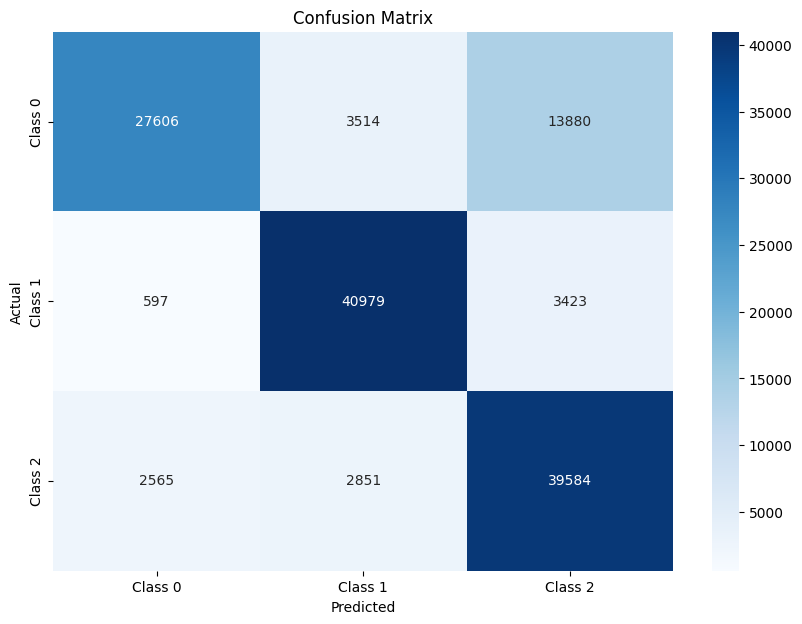

In [ ]:
# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred)

### LightGBM ROC Curves


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023992 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 144
[LightGBM] [Info] Number of data points in the train set: 314996, number of used features: 21
[LightGBM] [Info] Start training from score -1.098600
[LightGBM] [Info] Start training from score -1.098638
[LightGBM] [Info] Start training from score -1.098600
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 145
[LightGBM] [Info] Number of data points in the train set: 314996, number of used features: 21
[LightGBM] [Info] Start training from score -1.791747
[LightGBM] [Info] Start training from score -1.098638
[LightGBM] [Info] Start 

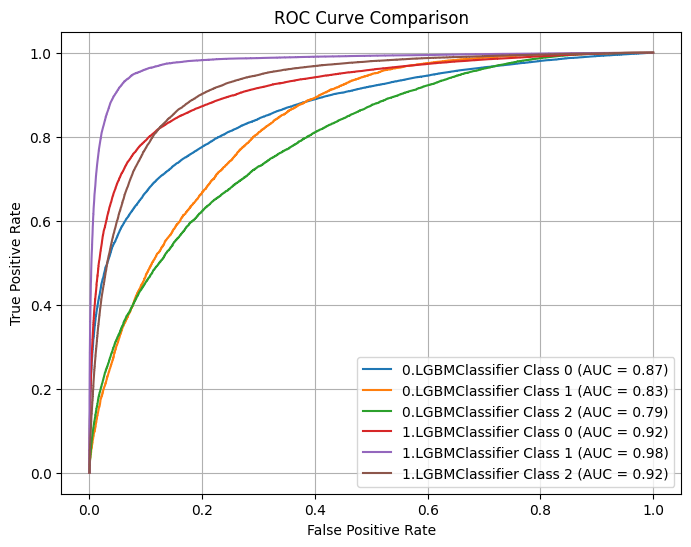

In [71]:
# Plot ROC curves with and without hyperparameters
clfs = [
    LGBMClassifier(),
    LGBMClassifier(
    random_state=42,
    max_depth=30,
    n_estimators=300,
    min_child_samples=2,
    num_leaves=150,
    learning_rate=0.2,
    class_weight={0: 1, 1: 2, 2: 3}
)]
plot_roc_curves(clfs)


## Model 4: Logistic Regression

### Logistic Regression ( Without Feature Selection and Hyperparameters)

In [ ]:
# Train/Test Split
x = resampled_df.drop(columns=['Diabetes_012'])
y = resampled_df['Diabetes_012'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y )

In [ ]:
# Model Setup

model = LogisticRegression()

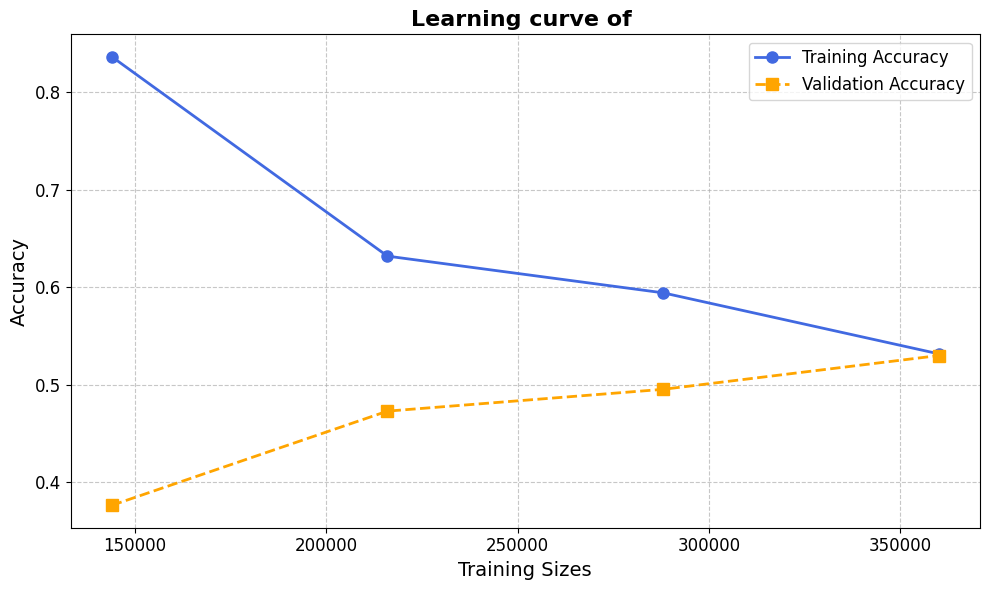

In [ ]:
# Learning Curve
plot_learning_curve(model, x, y, title="Learning curve of Logistic Regression ( Without Feature Selection and Hyperparameters)")

In [ ]:
# Model Fitting
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Evaluate Model
y_pred = model.predict(X_test)
evaluate_model("LR_WFS_WHP", y_test,y_pred)

Metrics for LR_WFS_WHP:
Accuracy: 0.5322
Precision: 0.5325
Recall: 0.5322
F1_score: 0.5323

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.63      0.62     45000
           1       0.45      0.46      0.46     44999
           2       0.53      0.51      0.52     45000

    accuracy                           0.53    134999
   macro avg       0.53      0.53      0.53    134999
weighted avg       0.53      0.53      0.53    134999



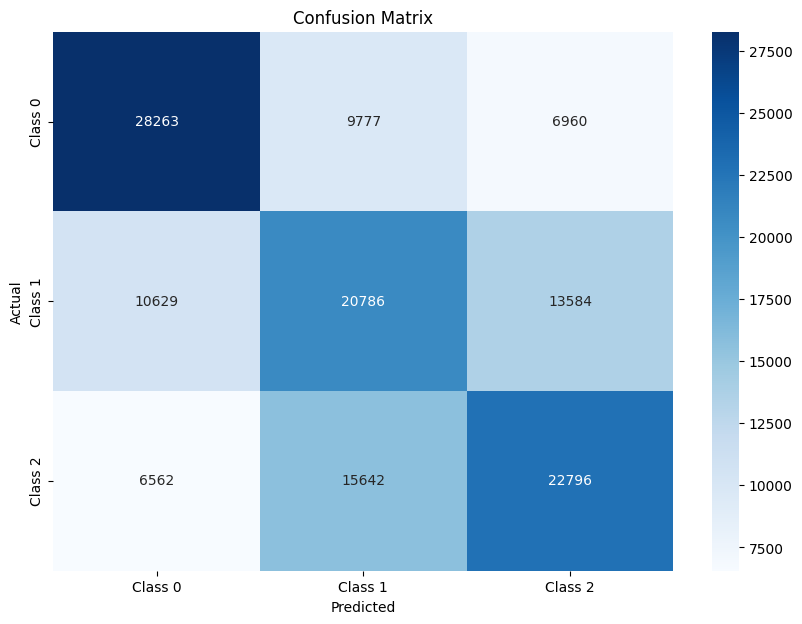

In [ ]:
# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred)

### Logistic Regression ( Without Feature Selection )


In [ ]:
# Train/Test Split
x = resampled_df.drop(columns=['Diabetes_012'])
y = resampled_df['Diabetes_012'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y )

In [ ]:
# Model Setup

model = LogisticRegression(solver='saga', penalty='l1', multi_class='multinomial', C=10)

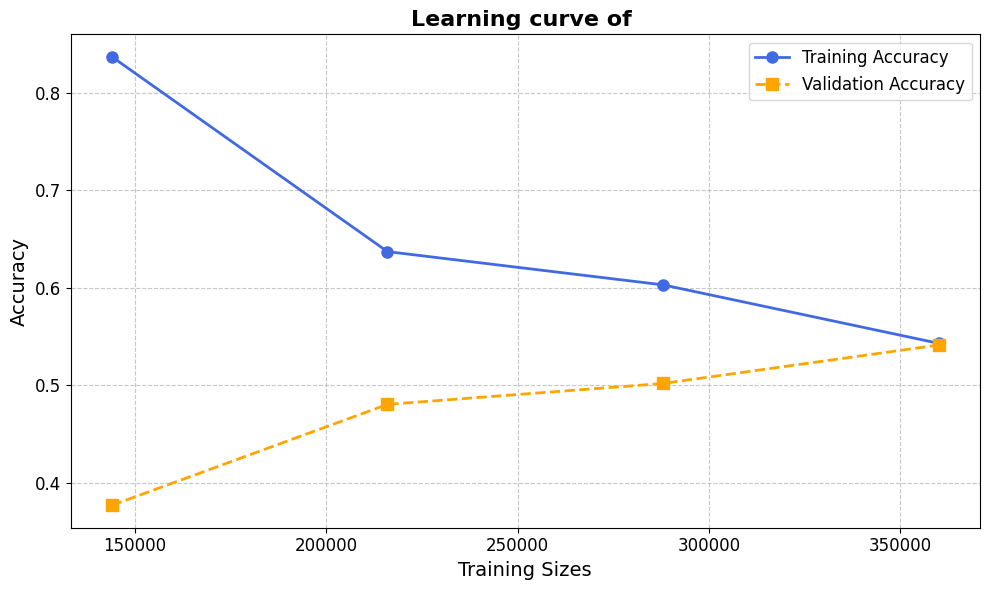

In [ ]:
# Learning Curve
plot_learning_curve(model, x, y, title="Learning curve of Logistic Regression ( Without Feature Selection )")

In [ ]:
# Model Fitting
model.fit(X_train, y_train)

LogisticRegression(C=10, multi_class='multinomial', penalty='l1', solver='saga')

In [ ]:
# Hyperparameter Tuning
"""
param_dist = {
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'penalty': ['l2', 'none'],
    'C': [0.01, 0.1, 1, 10],
}

random_search = RandomizedSearchCV(LogisticRegression(random_state=42), param_dist, n_iter=100, scoring='recall', cv=5, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)
best_params = random_search.best_params_
print("Best Parameters:", best_params)

"""


Best Parameters: {'solver': 'saga', 'penalty': 'l1', 'C': 10}


In [ ]:
# Evaluate Model
y_pred = model.predict(X_test)
evaluate_model("LR_WFS", y_test,y_pred)

Metrics for LR_WFS:
Accuracy: 0.5425
Precision: 0.5427
Recall: 0.5425
F1_score: 0.5426

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.64      0.64     45000
           1       0.46      0.46      0.46     44999
           2       0.53      0.52      0.53     45000

    accuracy                           0.54    134999
   macro avg       0.54      0.54      0.54    134999
weighted avg       0.54      0.54      0.54    134999



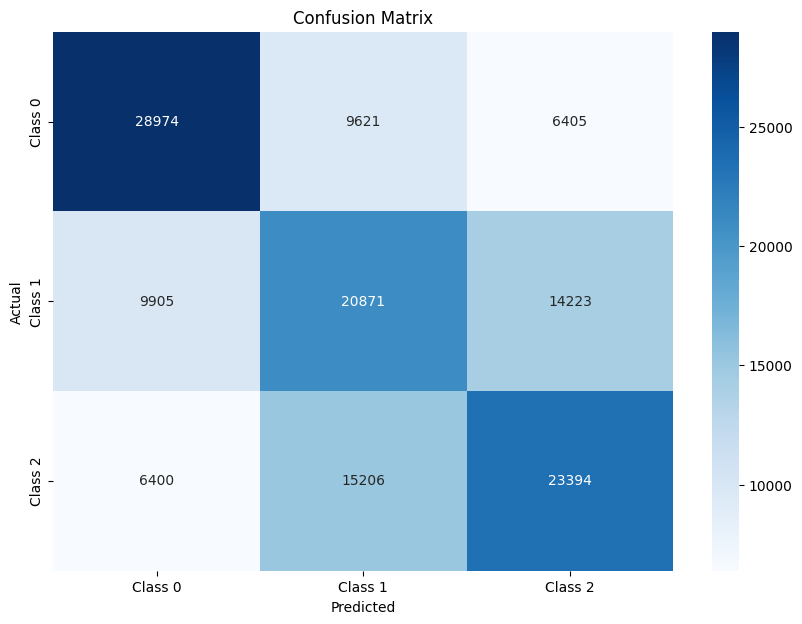

In [ ]:
# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred)

### Logistic Regression ( With Feature Selection )


In [ ]:
# Train/Test Split
x = resampled_df[list(common_features)]
y = resampled_df['Diabetes_012'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y )

In [ ]:
# Model Setup

model = LogisticRegression(solver='saga', penalty='l1', multi_class='multinomial', C=10)

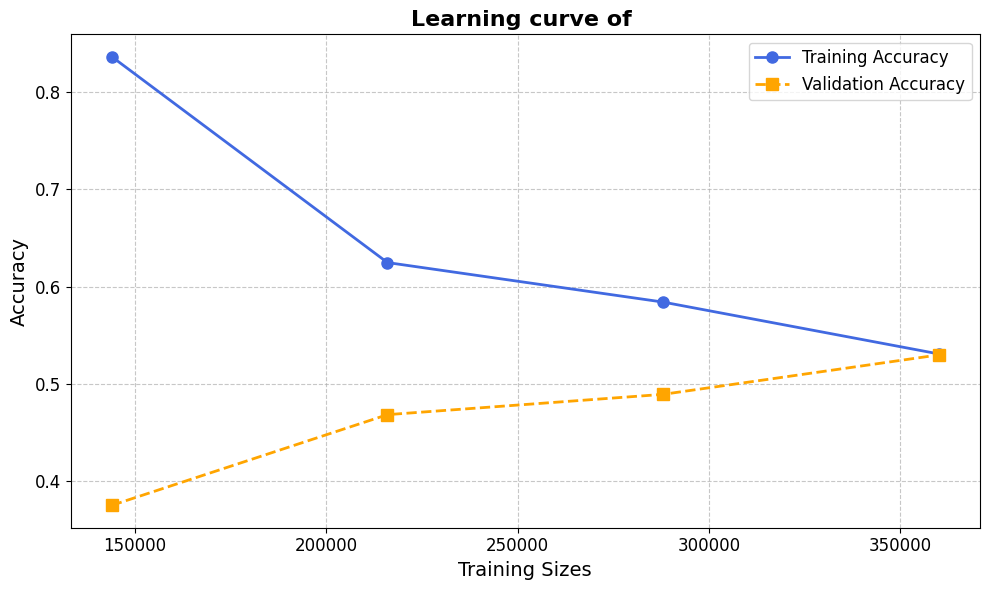

In [ ]:
# Learning Curve
plot_learning_curve(model, x, y, title="Learning curve of Logistic Regression ( With Feature Selection and Hyperparameters)")

In [ ]:
# Model Fitting
model.fit(X_train, y_train)

LogisticRegression(C=10, multi_class='multinomial', penalty='l1', solver='saga')

In [ ]:
# Hyperparameter Tuning
"""
param_dist = {
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'penalty': ['l2', 'none'],
    'C': [0.01, 0.1, 1, 10],
}

random_search = RandomizedSearchCV(LogisticRegression(random_state=42), param_dist, n_iter=100, scoring='recall', cv=5, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)
best_params = random_search.best_params_
print("Best Parameters:", best_params)

"""

Best Parameters: {'solver': 'saga', 'penalty': 'l1', 'C': 10}


In [ ]:
# Evaluate Model
y_pred = model.predict(X_test)
evaluate_model("LR_FS", y_test,y_pred)

Metrics for LR_FS:
Accuracy: 0.5292
Precision: 0.5257
Recall: 0.5292
F1_score: 0.5271

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.64      0.63     45000
           1       0.44      0.41      0.42     44999
           2       0.52      0.54      0.53     45000

    accuracy                           0.53    134999
   macro avg       0.53      0.53      0.53    134999
weighted avg       0.53      0.53      0.53    134999



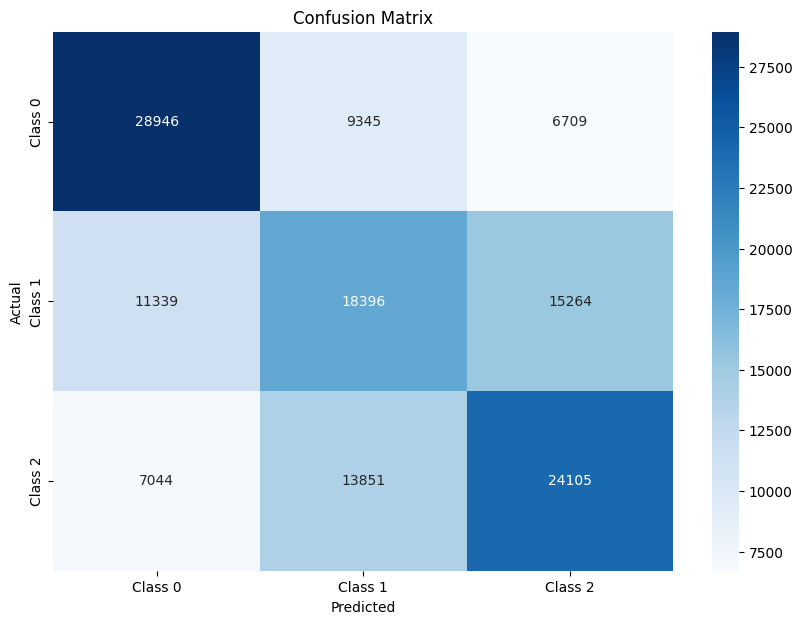

In [ ]:
# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred)

### Logistic Regression ROC Curves


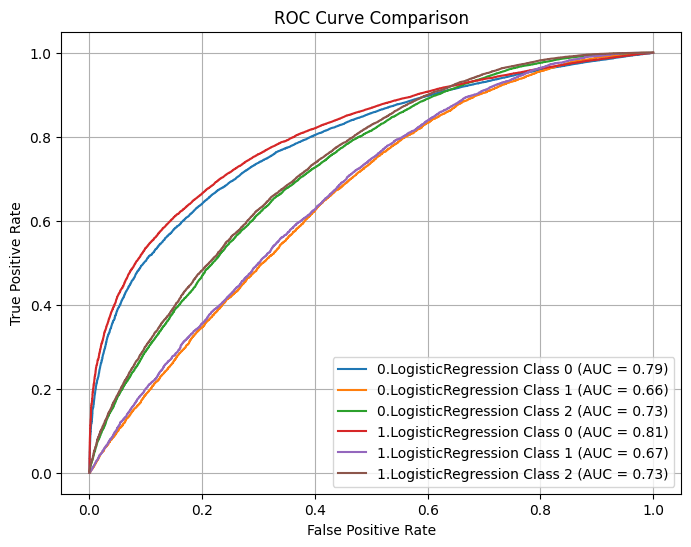

In [72]:
# Plot ROC curves with and without hyperparameters
clfs = [
    LogisticRegression(),
    LogisticRegression(solver='saga', penalty='l1', multi_class='multinomial', C=10)]
plot_roc_curves(clfs)


## All Models ROC Curves

In this section we will compare the ROC curves of the base models ( No Hyperparameters ), as well as all models with their respective hyperparameters

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023004 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 144
[LightGBM] [Info] Number of data points in the train set: 314996, number of used features: 21
[LightGBM] [Info] Start training from score -1.098600
[LightGBM] [Info] Start training from score -1.098638
[LightGBM] [Info] Start training from score -1.098600


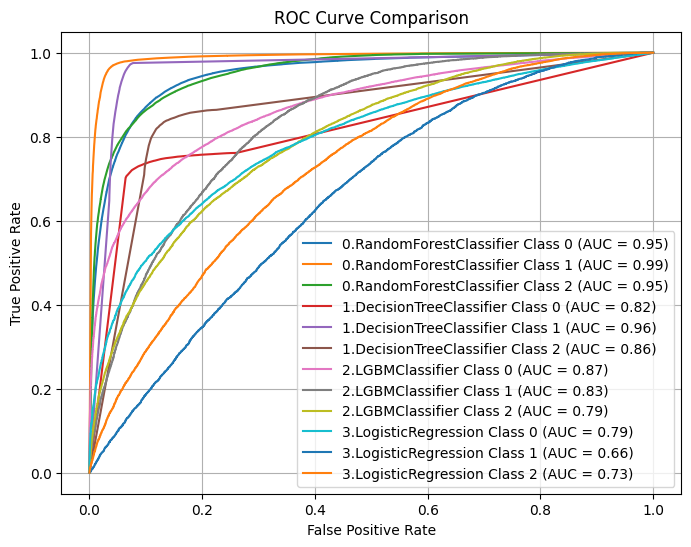

In [73]:
# Plot ROC curves for all models ( without hyperparameters )
clfs = [
    RandomForestClassifier(n_jobs=-1),
    DecisionTreeClassifier(),
    LGBMClassifier(),
    LogisticRegression(),
    ]
plot_roc_curves(clfs)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023094 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 145
[LightGBM] [Info] Number of data points in the train set: 314996, number of used features: 21
[LightGBM] [Info] Start training from score -1.791747
[LightGBM] [Info] Start training from score -1.098638
[LightGBM] [Info] Start training from score -0.693134


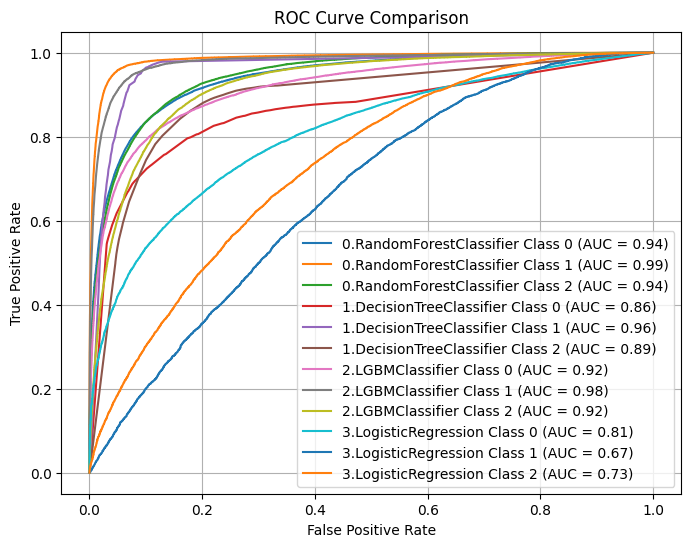

In [74]:
# Plot ROC curves for all models ( with hyperparameters )
clfs = [
    RandomForestClassifier(
    random_state=42,
    max_depth=25,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='log2',
    n_estimators=150,
    n_jobs=-1,
    class_weight={0: 1, 1: 2, 2: 3}
    ),
    DecisionTreeClassifier(
    random_state=42,
    max_depth=30,
    min_samples_split=3,
    min_samples_leaf=3,
    max_features=None,
    class_weight={0: 1, 1: 2, 2: 4}
    ),
    LGBMClassifier(
    random_state=42,
    max_depth=30,
    n_estimators=300,
    min_child_samples=2,
    num_leaves=150,
    learning_rate=0.2,
    class_weight={0: 1, 1: 2, 2: 3}
    ),
    LogisticRegression(solver='saga', penalty='l1', multi_class='multinomial', C=10),
    ]
plot_roc_curves(clfs)

## Remarks / Notes

I experimented with a variety of other models that didn't make it here due to their fair share of cons that caused them to be difficult to deal with in this project. 

The list includes:
- **SVMs:**  They took way too much time. Fitting the model and xperimenting with any kind of hyperparamter tuning proved to be time-consuming and computationally very expensive.

- **KNNs:** Similar to SVMs, KNNs work decently well on smaller datasets, which is not the case here. The choice was between smalled k value, which yielded lacklustre results, or high k value, which took hours upon hours to display in the learning curve or even fit.

- **Linear Regression with SGD:** Much like the linear regression shown in this notebook, this model is too simple to capture anything meaningful. No matter how much effort was put to make it complex, you can't use a linear model on a non-linear dataset and expect any valuable results

- **XGBoost:** Although in principle it should yield great results, the size of the dataset proved to be a challenge to ever finish running. Hence why it was replaced with LightGBM above.

# Comparison

Lastly, after going through exploration, cleaning, resampling and training multiple models to their peak performance, we can make justifiable comparison between each of their performances and which yielded the best results

In [ ]:
# Legend that explains the meaning of a model name based on their prefix and suffix
legend_dict = {
        'RF': 'Random Forest',
        'DT': 'Decision Tree',
        'LGBM': 'LightGBM',
        'LR': 'Logistic Regression',
        'WHP': 'Without Feature Selection and Hyperparameters',
        'WFS': 'Without Feature Selection, With Hyperparameters',
        '_FS': 'With Feature Selection and Hyperparameters'
    }

metrics = ['accuracy', 'precision', 'recall', 'f1_score']

In [ ]:
# Plot the bar chart
def plot_metrics_comparison(models_list, metric_name, title):
    values = [models[model][metric_name] for model in models_list]
    plt.figure(figsize=(10, 6))
    plt.barh(models_list, values, color='skyblue')
    plt.xlabel(metric_name.capitalize())
    plt.title(title)
    plt.show()

In [ ]:
# Plot comparison between models ending with 'WHP', 'WFS', 'FS' and starting with 'RF', 'DT', 'LGBM', 'LR'

def plot_selected_models_comparison(location=None, comparison=None, title='All Models'):

    models_selected = models.keys()

    if location == 'ending':
        models_selected = [model for model in models.keys() if model.endswith(comparison)]
        title = f"Models ({legend_dict[comparison]})"

    elif location == "starting":
        models_selected = [model for model in models.keys() if model.startswith(comparison)]
        title = f"Models {legend_dict[comparison]}"


    for metric in metrics:
        plot_metrics_comparison(models_selected, metric, f'Comparison of {metric.capitalize()} for {title} ')


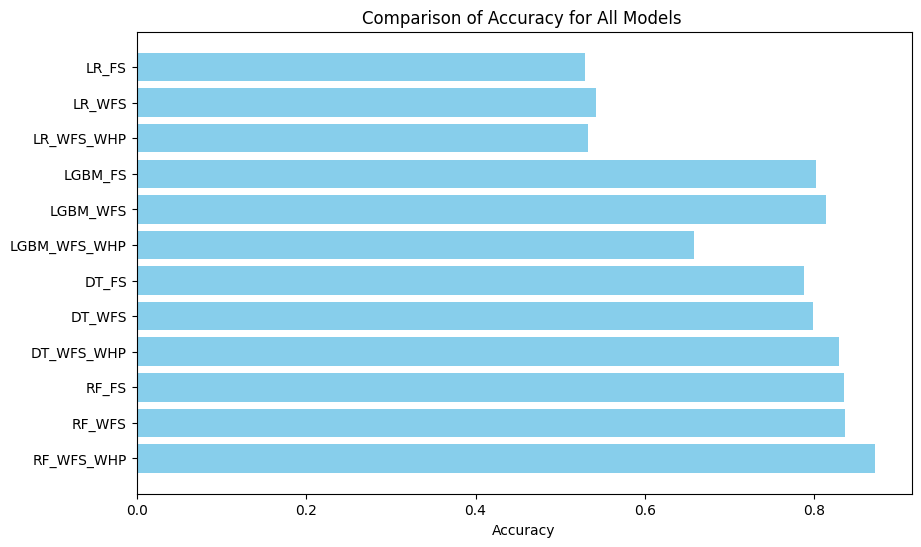

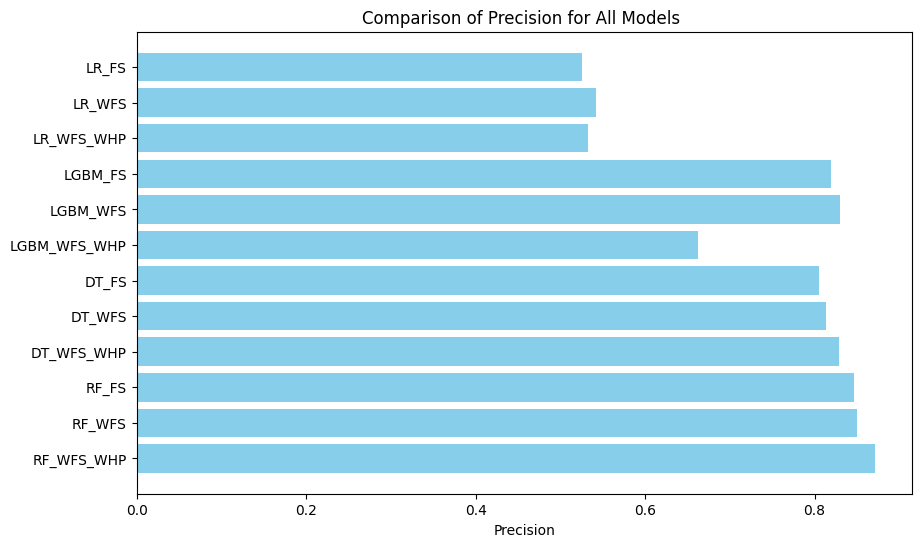

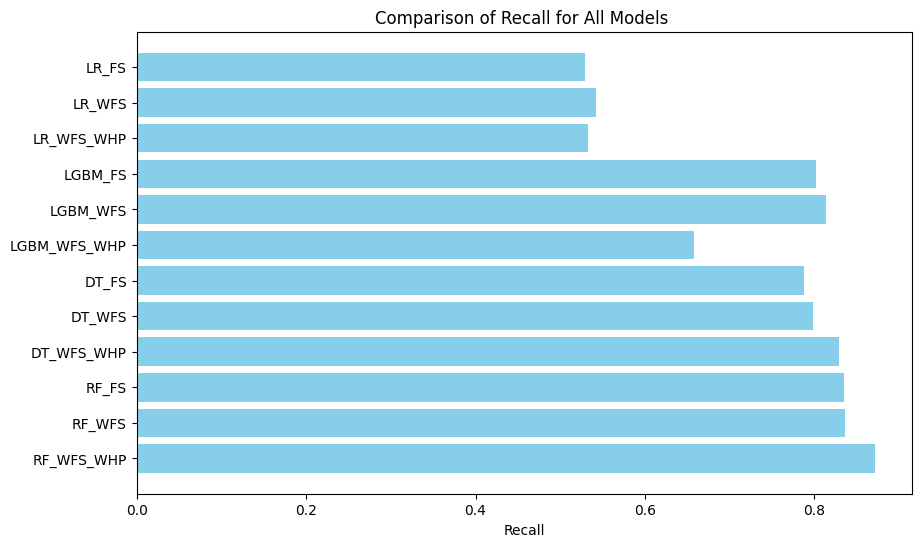

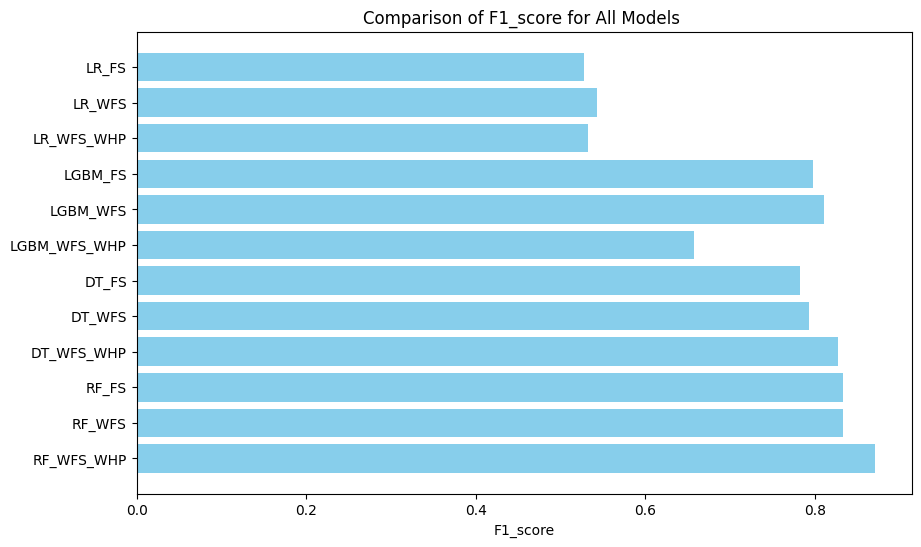

In [ ]:
# Compare all models based on 'accuracy', 'precision', 'recall', and 'f1_score'
plot_selected_models_comparison()

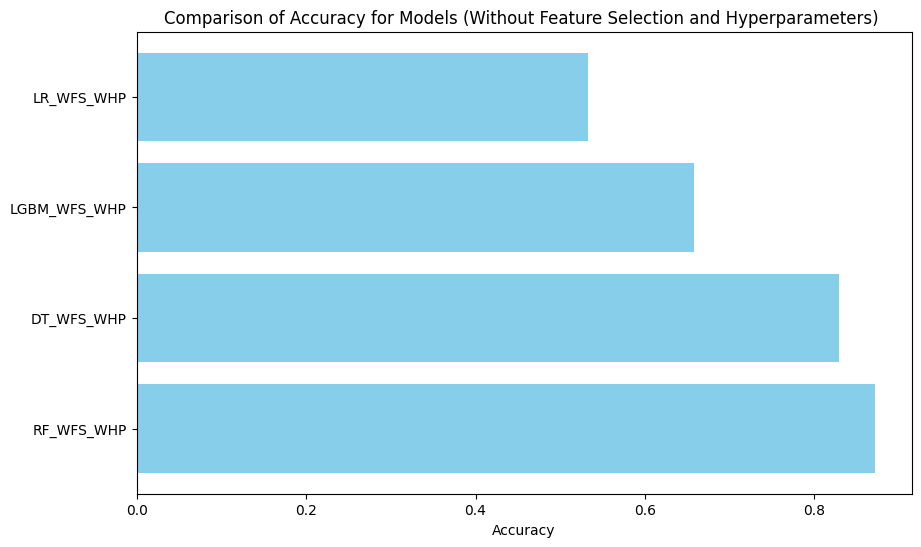

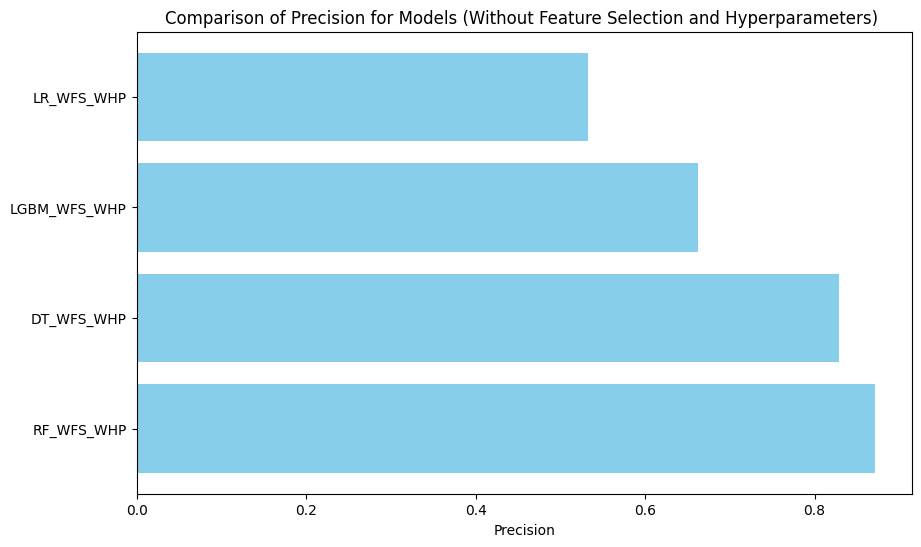

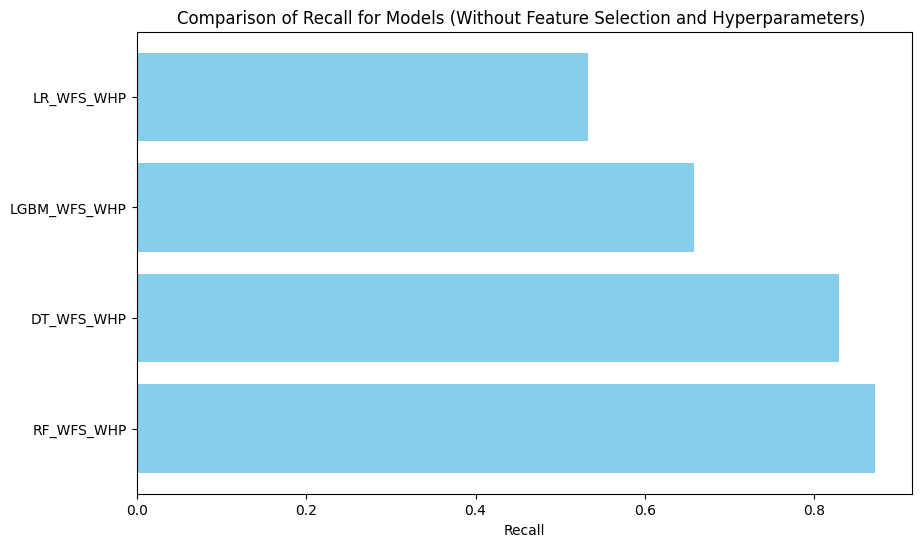

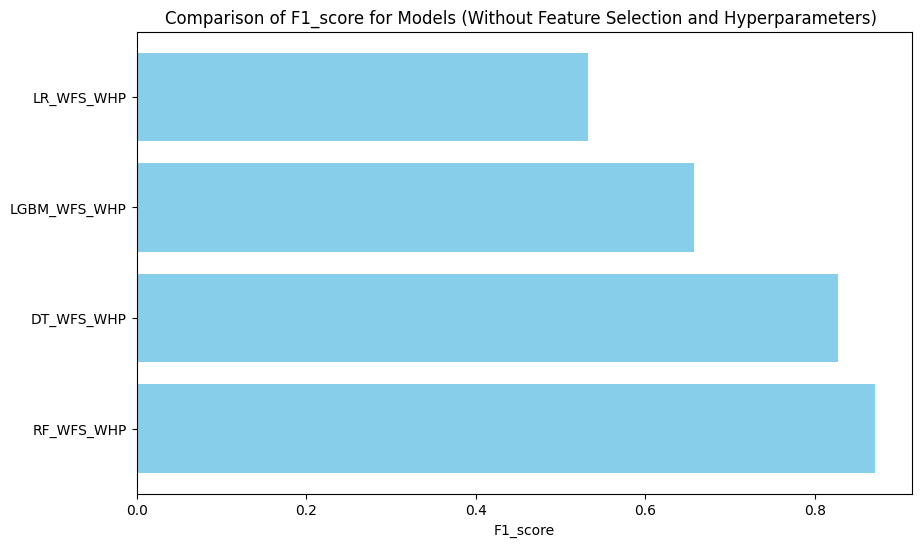

In [ ]:
# Compare models without feature selection and hyperparameters based on 'accuracy', 'precision', 'recall', and 'f1_score'
plot_selected_models_comparison('ending','WHP')

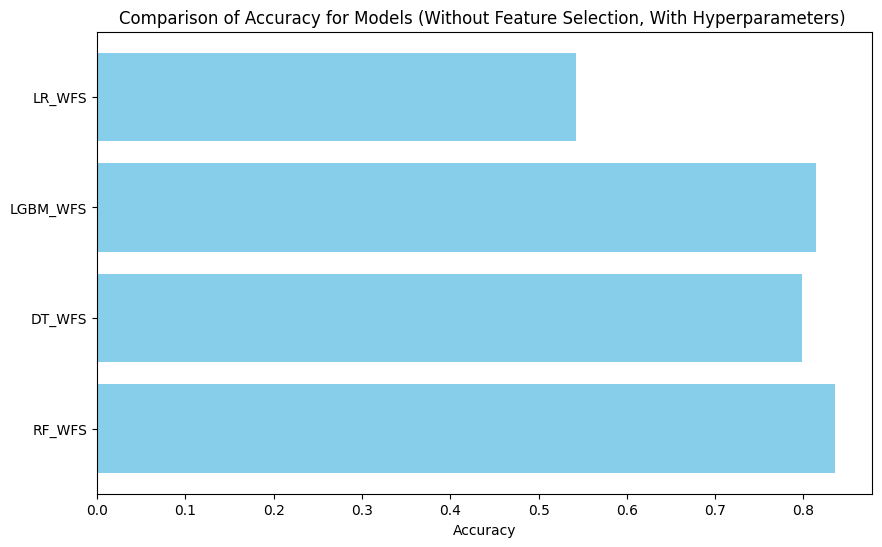

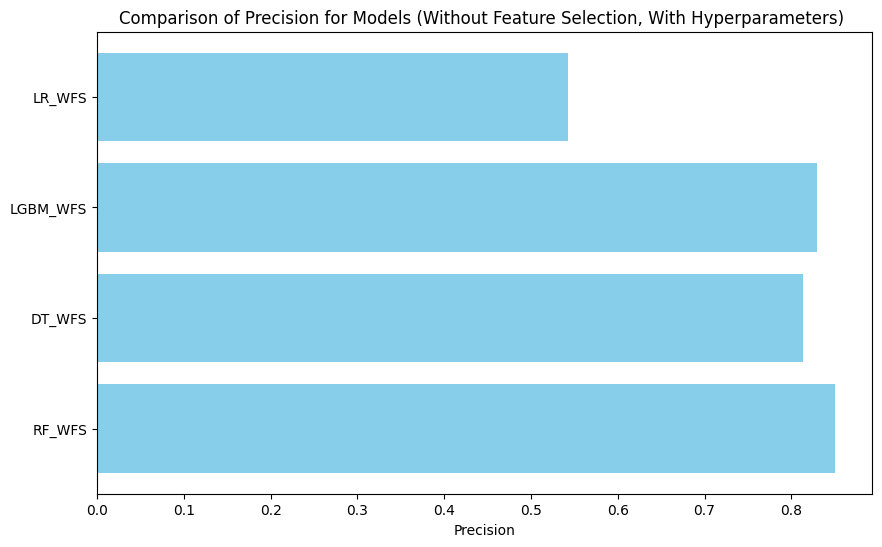

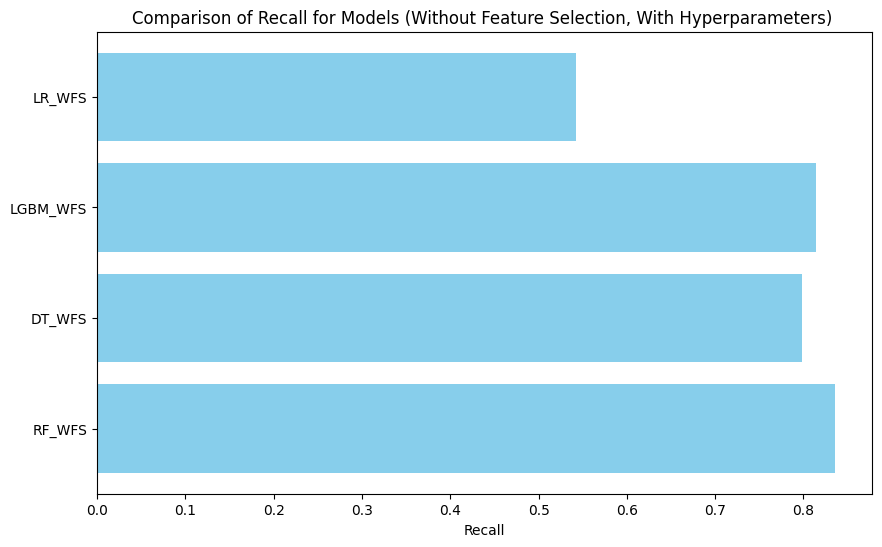

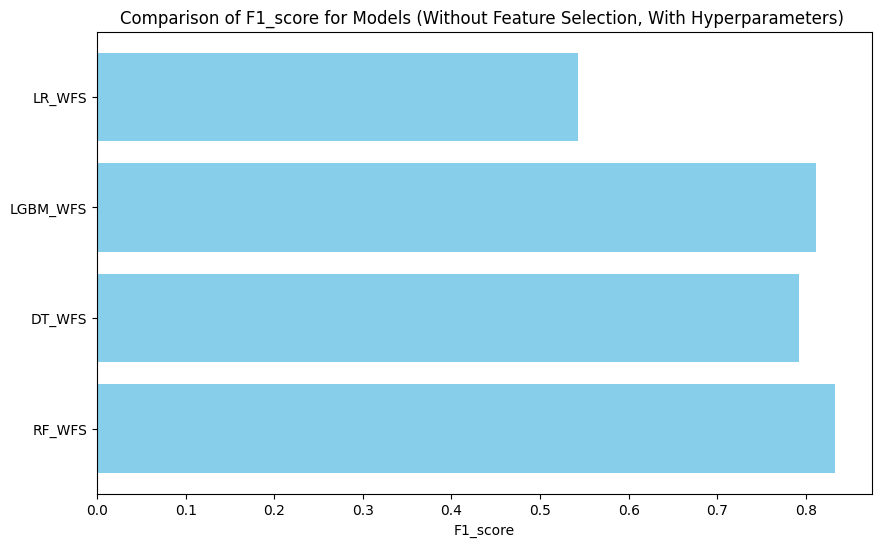

In [ ]:
# Compare models without feature selection but with hyperparameters based on 'accuracy', 'precision', 'recall', and 'f1_score'
plot_selected_models_comparison('ending','WFS')

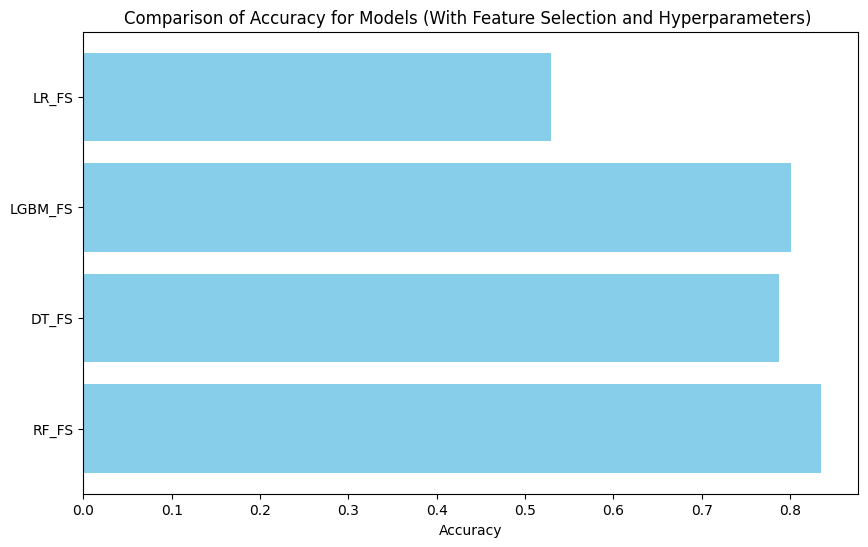

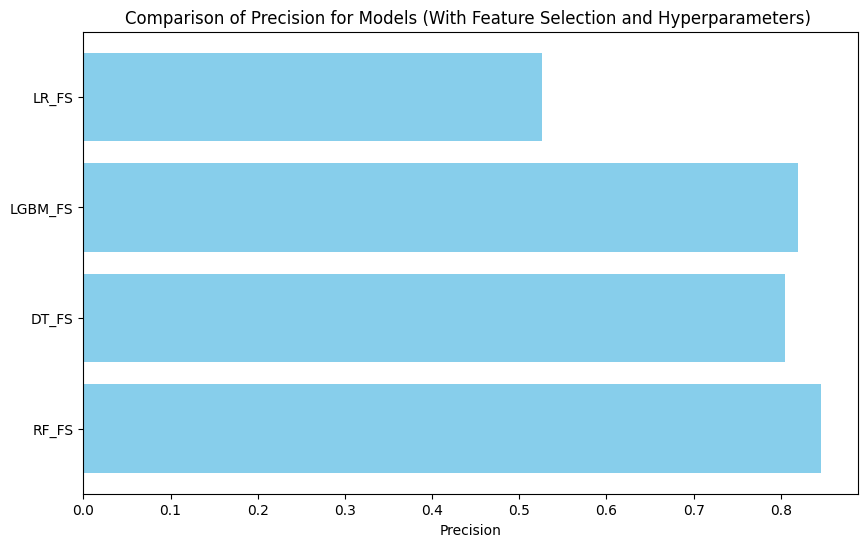

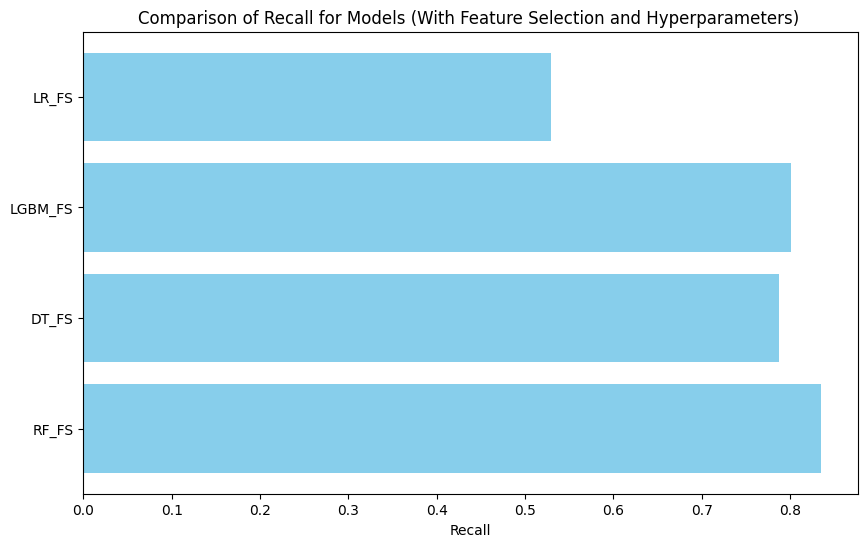

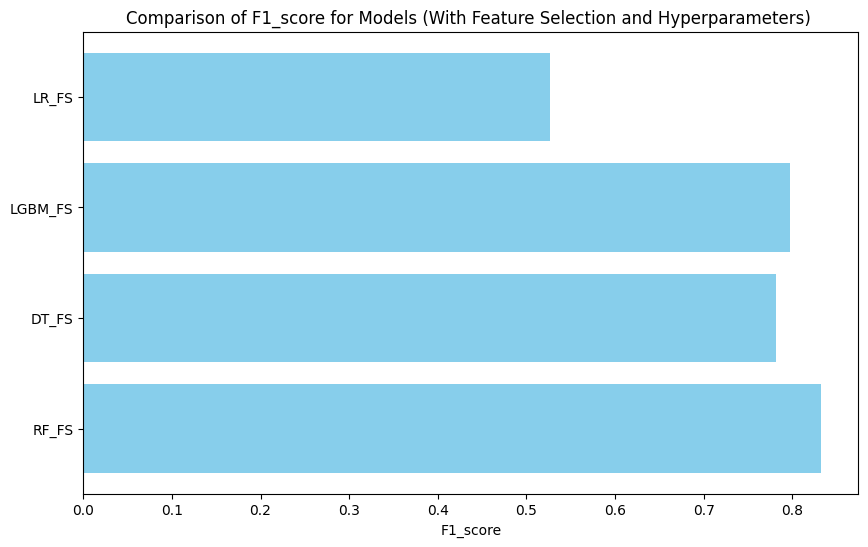

In [ ]:
# Compare models with feature selection band with hyperparameters based on 'accuracy', 'precision', 'recall', and 'f1_score'
plot_selected_models_comparison('ending','_FS')

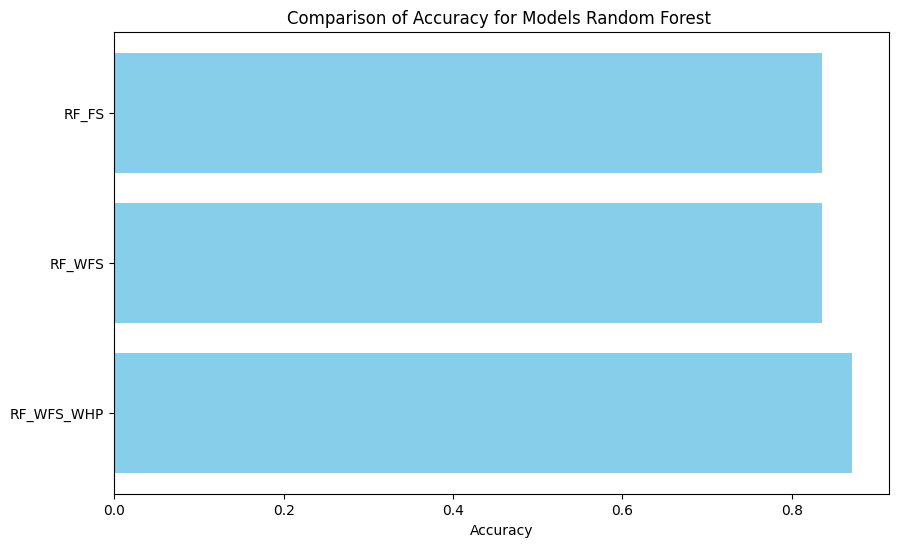

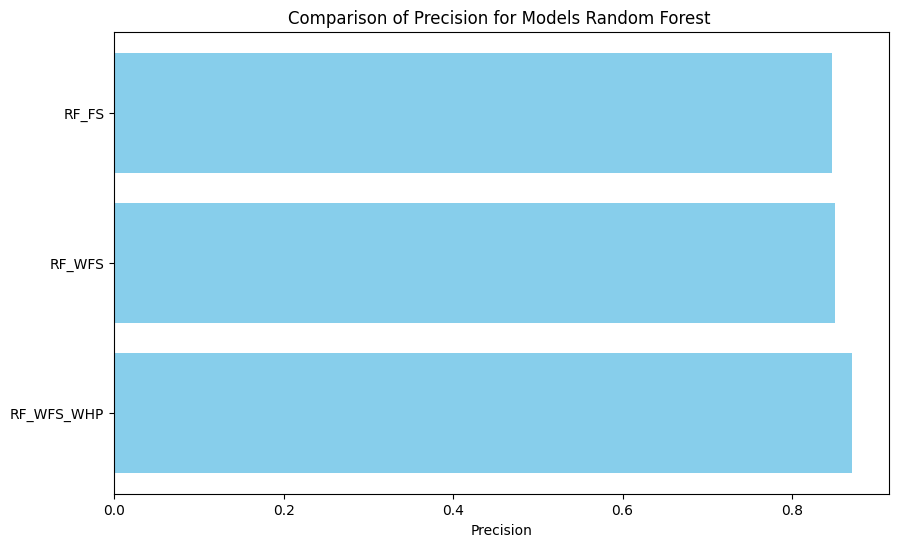

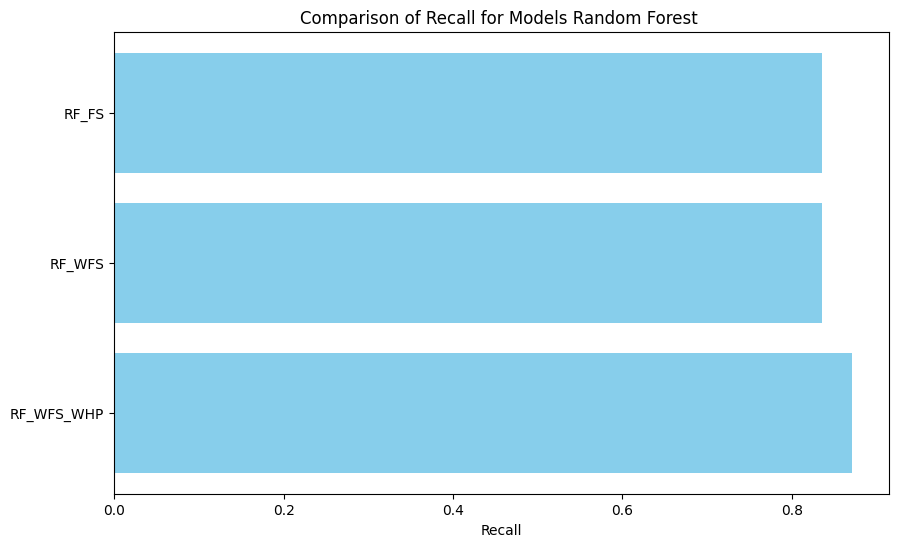

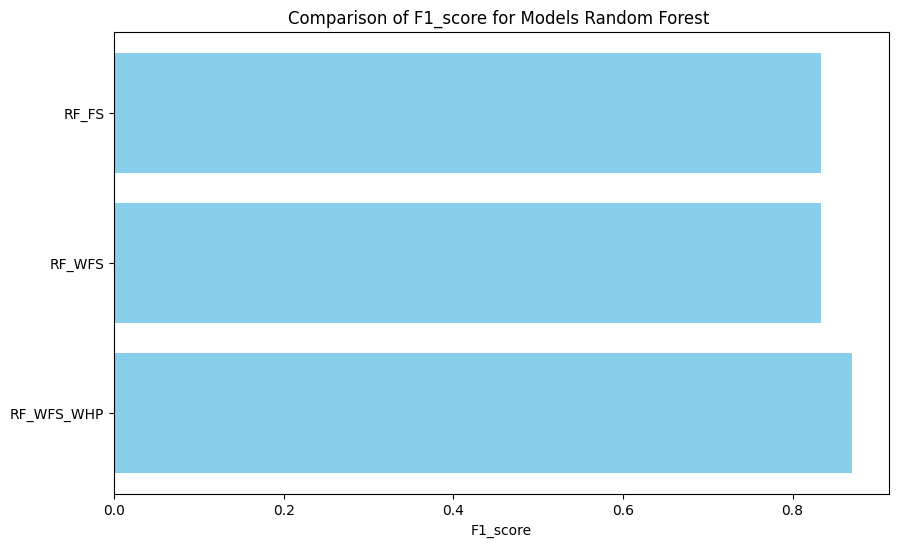

In [ ]:
# Compare all different Random Forest models based on 'accuracy', 'precision', 'recall', and 'f1_score'
plot_selected_models_comparison('starting','RF')

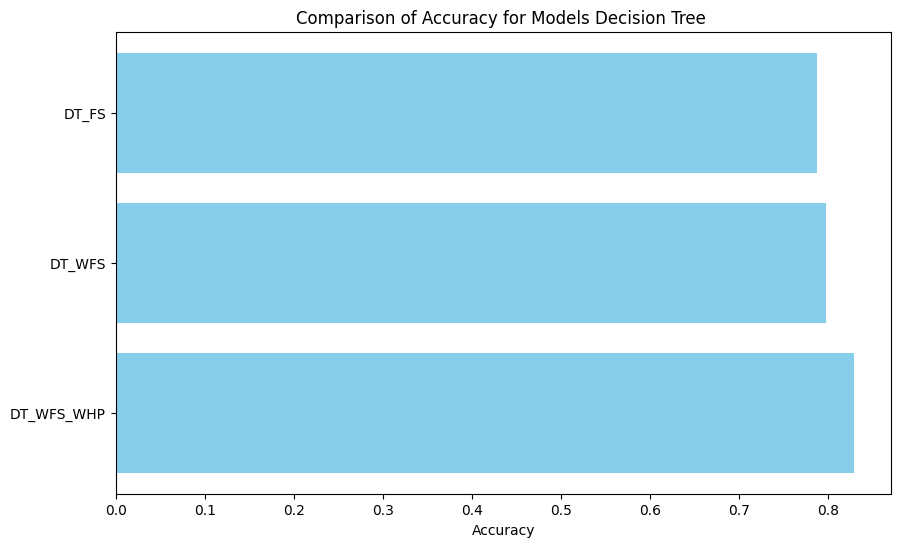

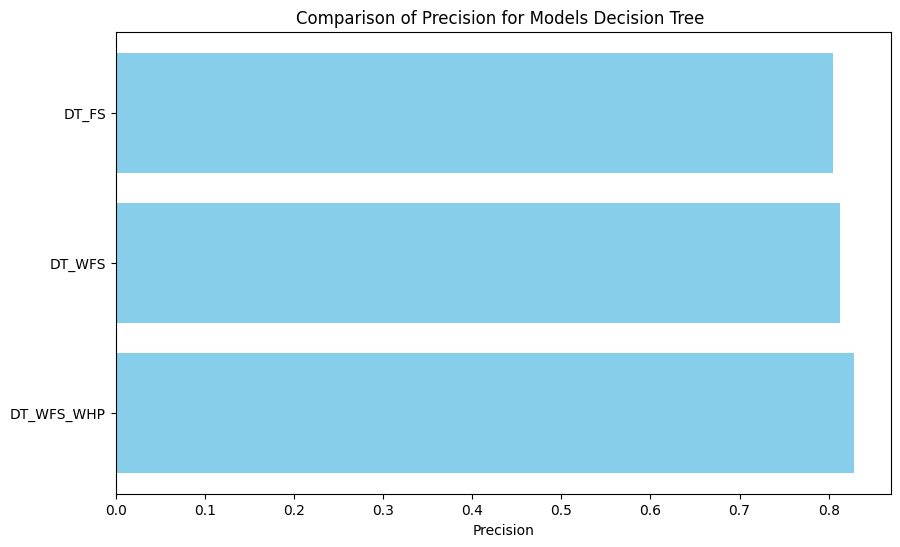

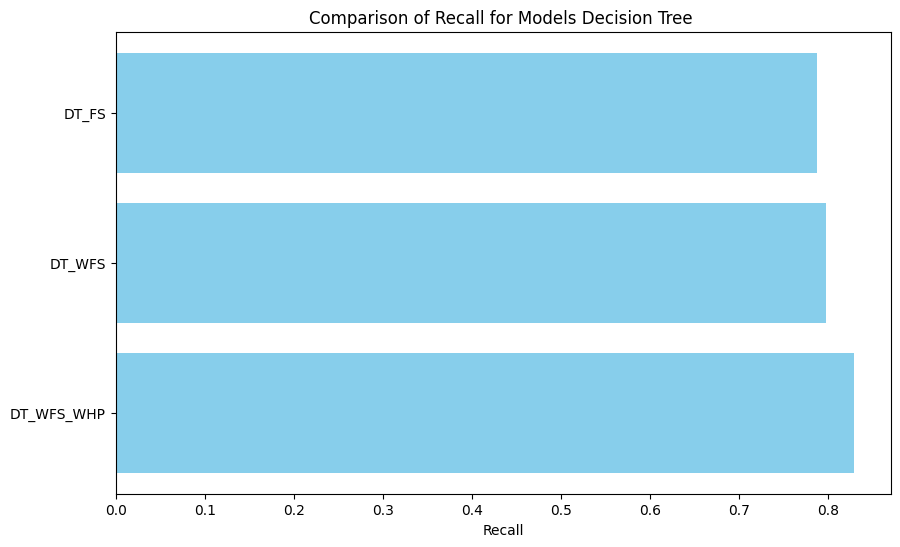

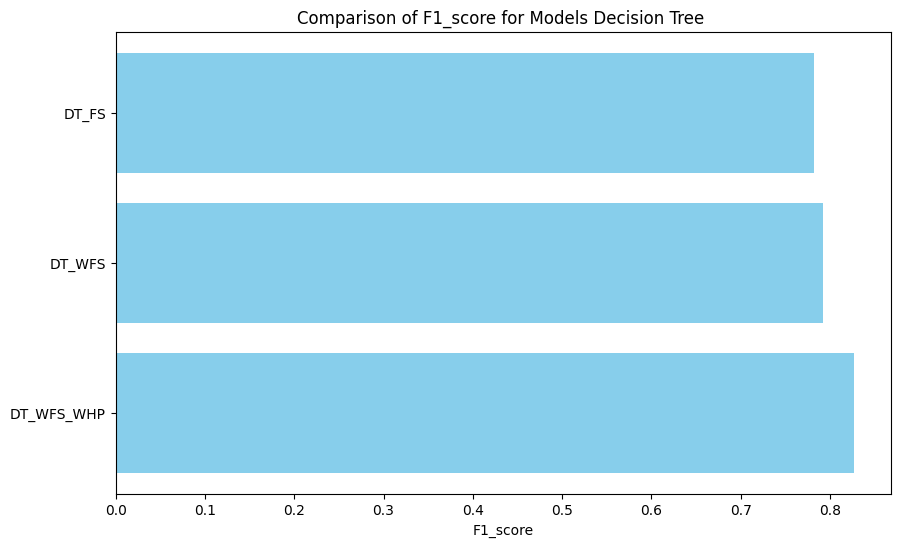

In [ ]:
# Compare all different Decision Tree models based on 'accuracy', 'precision', 'recall', and 'f1_score'
plot_selected_models_comparison('starting','DT')

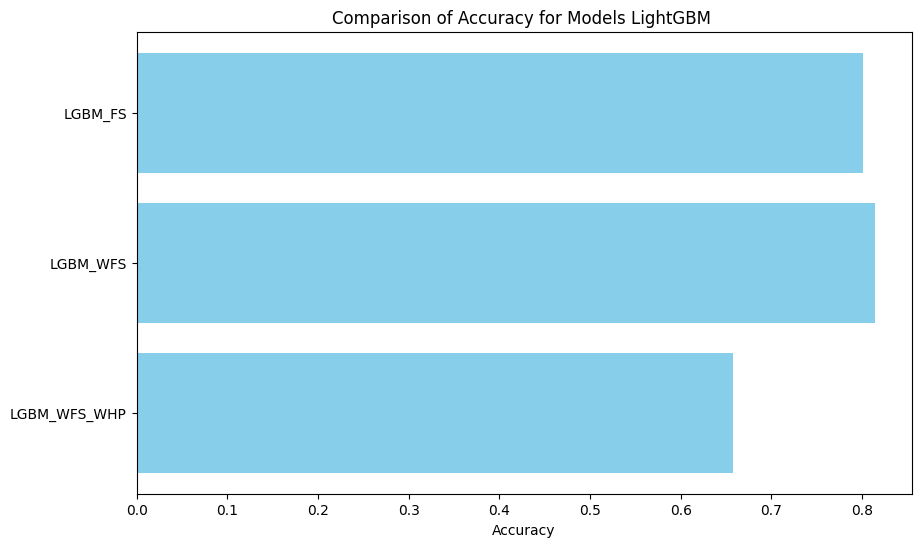

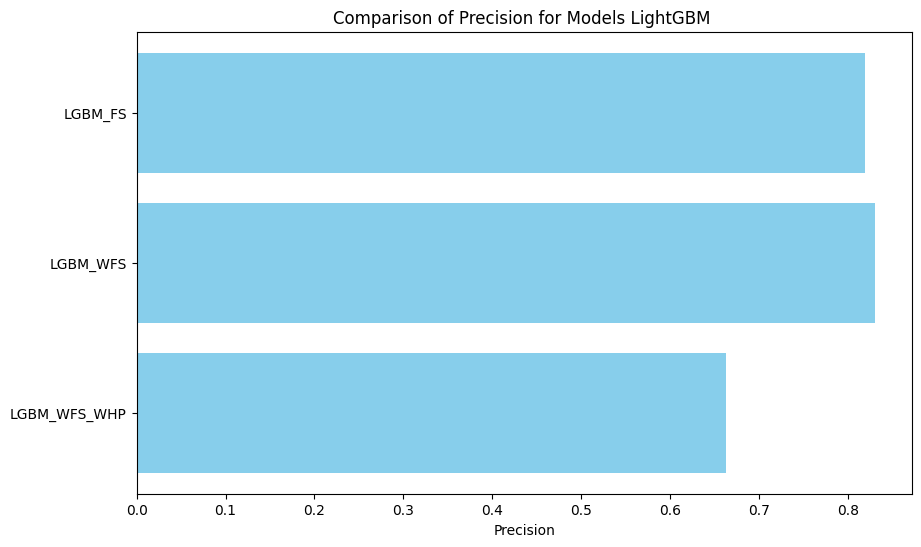

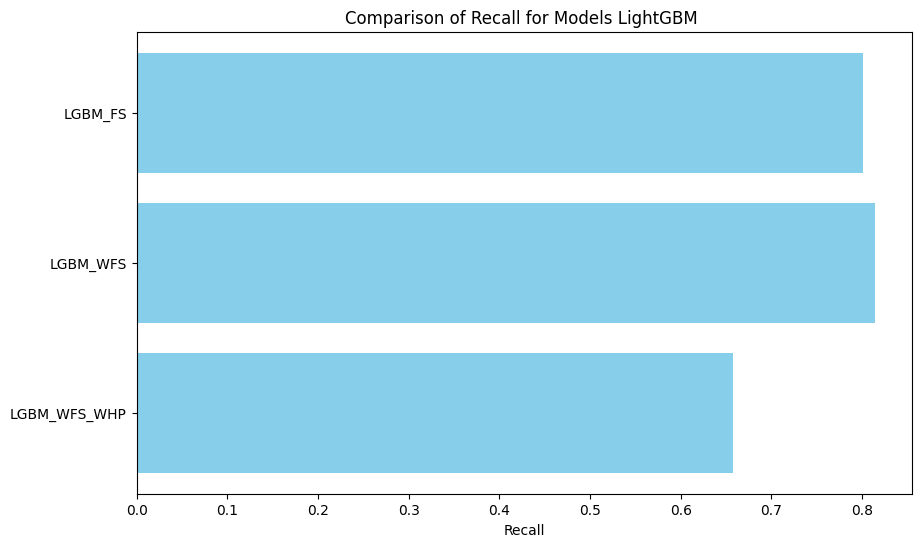

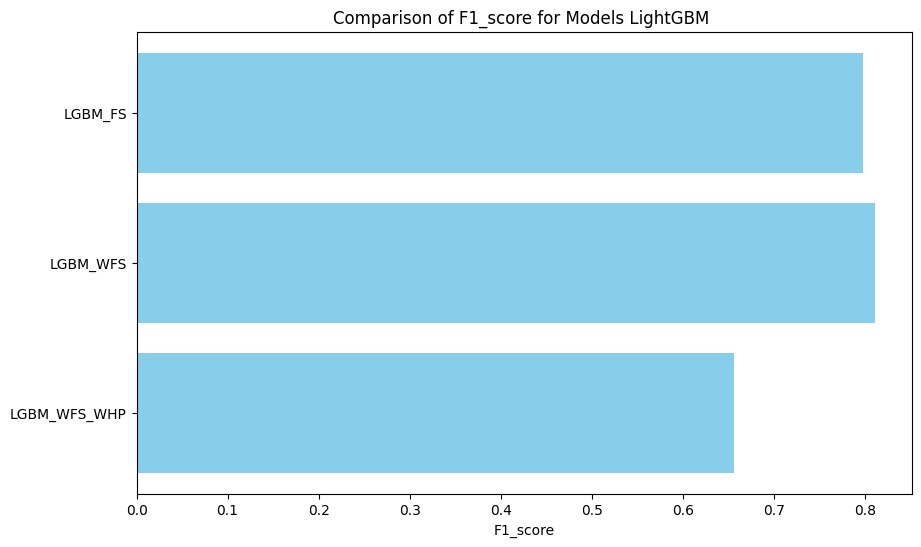

In [ ]:
# Compare all different LightGBM models based on 'accuracy', 'precision', 'recall', and 'f1_score'
plot_selected_models_comparison('starting','LGBM')

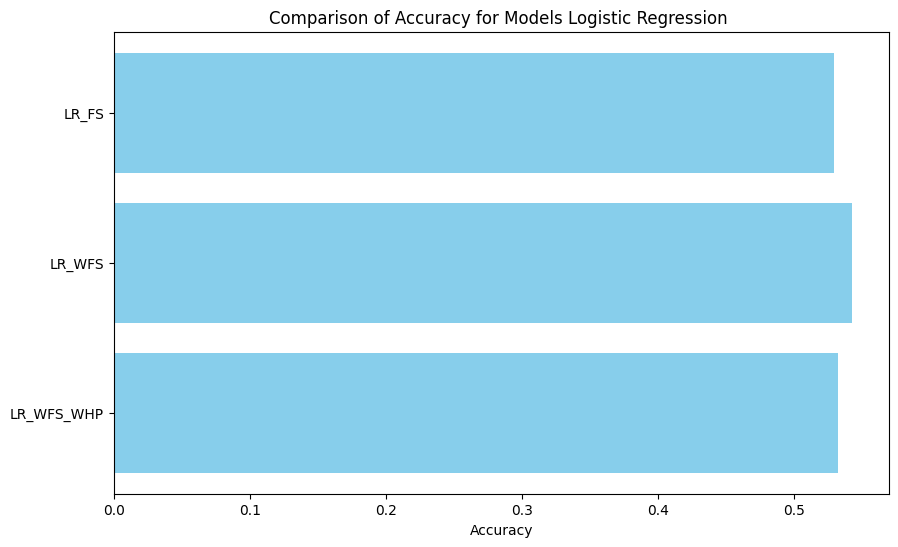

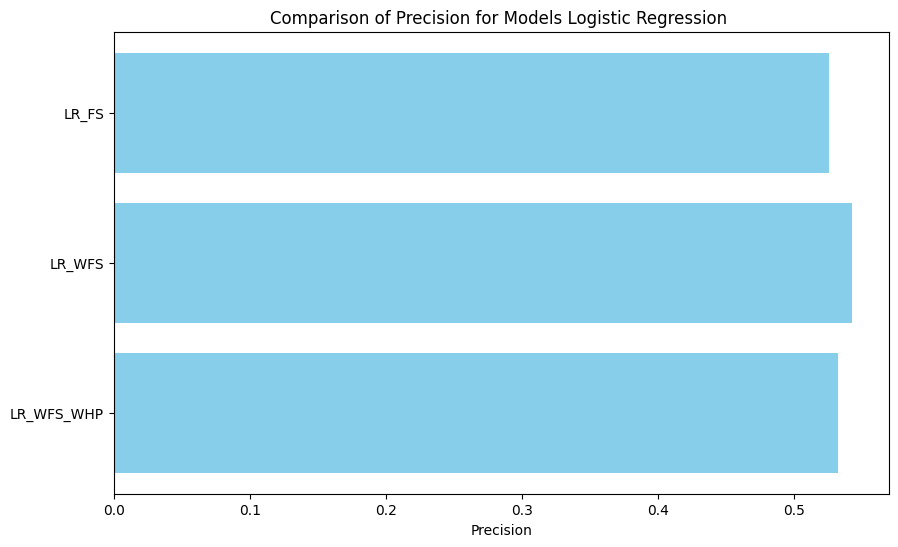

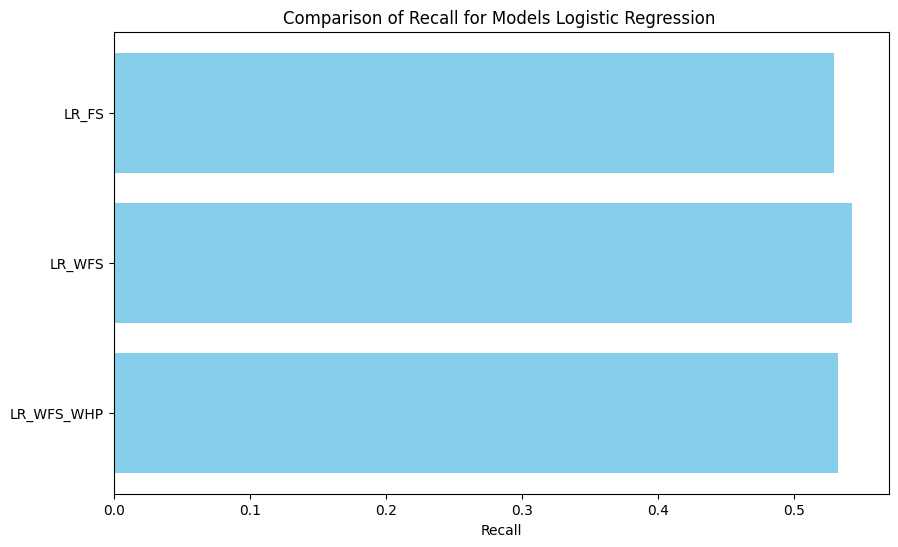

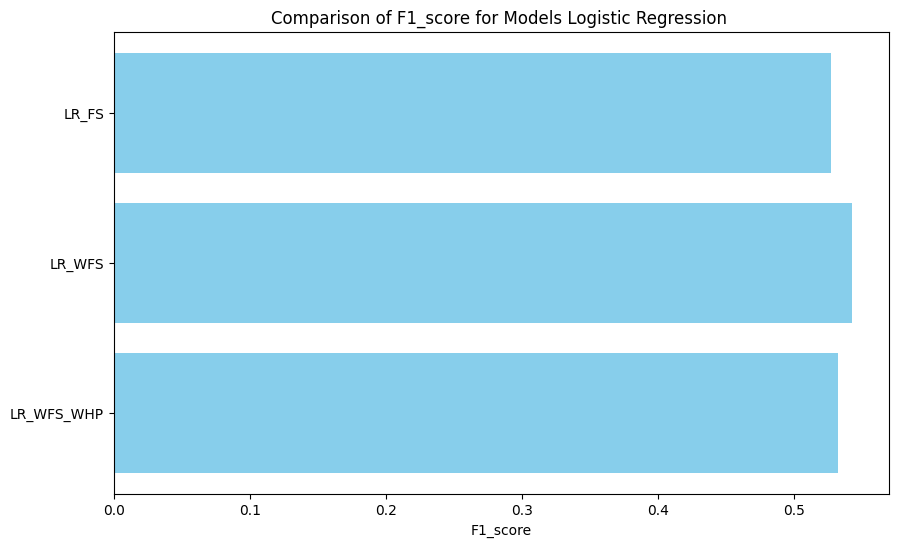

In [ ]:
# Compare all different Logistic Regression models based on 'accuracy', 'precision', 'recall', and 'f1_score'
plot_selected_models_comparison('starting','LR')

Finally, after several trials and assessments, Random Forest turned out to be the top-performing model in predicting the diagnosis of diabetes. It has outperformed all other models in a number of metrics, including recall, which is a very key metric in this scenario, because it reduces false negatives. The inclusion of feature selection and hyperparameter tuning does not enhance the model's performance in the metric but does achieve comparable levels of efficiency with lower computational power. Thus, we conclude that Random Forest is the most suitable model for predicting diabetes in this dataset, offering the best trade-off between accuracy, recall, and interpretability.